#Imports

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import string
import re
import nltk
import spacy

In [2]:
df = pd.read_csv('Instragram_after_Preprocessing.csv', encoding='utf-8')

In [3]:
df.head(5)

,Unnamed: 0,id,external_url,followers,posts_count,following,profile_image_link,likes,datetime,image_url,url,comments,thumbnails,account,hashtags,biography,caption,profile
0,0,2.770000e+18,http://www.drjoffily.co.uk/,23300.0,276.0,7003.0,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....,173.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CZki1wfvXYq/,17.0,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n...",maurino_joffily,"['#maurinojoffily', '#drmaurino', '#jÃ³ffily',...",have bbl authent expertnflag4 specialis vaserl...,quick recoveri result 10 day maurinojoffili dr...,Dr Maurino Joffily
1,1,2.760000e+18,http://www.drjoffily.co.uk/,23300.0,276.0,7003.0,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....,388.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CZUrYFrOO5v/,24.0,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n...",maurino_joffily,"['#maurinojoffily', '#drmaurino', '#drjoffily'...",have bbl authent expertnflag4 specialis vaserl...,thi patient happi chang bodi total new figur a...,Dr Maurino Joffily
2,2,2.760000e+18,http://www.drjoffily.co.uk/,23300.0,276.0,7003.0,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....,160.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CZAgVoyPi0i/,8.0,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n...",maurino_joffily,"['#maurino', '#joffily', '#joffilyvaser', '#dr...",have bbl authent expertnflag4 specialis vaserl...,360 vaser lipo fat transfer correct hip dip ma...,Dr Maurino Joffily
3,3,2.760000e+18,http://www.drjoffily.co.uk/,23300.0,276.0,7003.0,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....,211.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CY9pMGVP_BY/,24.0,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n...",maurino_joffily,"['#drjoffily', '#maurino', '#maurinojoffily', ...",have bbl authent expertnflag4 specialis vaserl...,breast uplift without implant good combin 360 ...,Dr Maurino Joffily
4,4,2.750000e+18,http://www.drjoffily.co.uk/,23300.0,276.0,7003.0,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....,210.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CYrbwXQrY3v/,15.0,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n...",maurino_joffily,"['#drmaurino', '#maurino', '#drjoffily', '#vas...",have bbl authent expertnflag4 specialis vaserl...,great transform combin procedur drmaurino maur...,Dr Maurino Joffily


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df

,id,external_url,followers,posts_count,following,profile_image_link,likes,datetime,image_url,url,comments,thumbnails,account,hashtags,biography,caption,profile
0,2.770000e+18,http://www.drjoffily.co.uk/,23300.0,276.0,7003.0,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....,173.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CZki1wfvXYq/,17.0,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n...",maurino_joffily,"['#maurinojoffily', '#drmaurino', '#jÃ³ffily',...",have bbl authent expertnflag4 specialis vaserl...,quick recoveri result 10 day maurinojoffili dr...,Dr Maurino Joffily
1,2.760000e+18,http://www.drjoffily.co.uk/,23300.0,276.0,7003.0,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....,388.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CZUrYFrOO5v/,24.0,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n...",maurino_joffily,"['#maurinojoffily', '#drmaurino', '#drjoffily'...",have bbl authent expertnflag4 specialis vaserl...,thi patient happi chang bodi total new figur a...,Dr Maurino Joffily
2,2.760000e+18,http://www.drjoffily.co.uk/,23300.0,276.0,7003.0,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....,160.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CZAgVoyPi0i/,8.0,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n...",maurino_joffily,"['#maurino', '#joffily', '#joffilyvaser', '#dr...",have bbl authent expertnflag4 specialis vaserl...,360 vaser lipo fat transfer correct hip dip ma...,Dr Maurino Joffily
3,2.760000e+18,http://www.drjoffily.co.uk/,23300.0,276.0,7003.0,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....,211.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CY9pMGVP_BY/,24.0,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n...",maurino_joffily,"['#drjoffily', '#maurino', '#maurinojoffily', ...",have bbl authent expertnflag4 specialis vaserl...,breast uplift without implant good combin 360 ...,Dr Maurino Joffily
4,2.750000e+18,http://www.drjoffily.co.uk/,23300.0,276.0,7003.0,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....,210.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CYrbwXQrY3v/,15.0,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n...",maurino_joffily,"['#drmaurino', '#maurino', '#drjoffily', '#vas...",have bbl authent expertnflag4 specialis vaserl...,great transform combin procedur drmaurino maur...,Dr Maurino Joffily
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58924,1.630000e+18,https://linktr.ee/drallenrezai,155118.0,776.0,376.0,https://scontent-iev1-1.cdninstagram.com/v/t51...,102.0,1.510000e+12,https://instagram.ftas2-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/BawCgfjDtqX/,1.0,"[{""src"":""https://instagram.ftas2-1.fna.fbcdn.n...",drallenrezai,[],consult reconstruct firm believ dpointright ðÿ...,see good peopl situat life alway beauti journey,Allen Rezai MD
58925,1.630000e+18,https://linktr.ee/drallenrezai,155118.0,776.0,376.0,https://scontent-iev1-1.cdninstagram.com/v/t51...,131.0,1.510000e+12,https://instagram.ftas1-2.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/BaqhugBDQvU/,6.0,"[{""src"":""https://instagram.ftas1-2.fna.fbcdn.n...",drallenrezai,[],consult reconstruct firm believ dpointright ðÿ...,expatwoman nese opportun tri prp skin rejuven ...,Allen Rezai MD
58926,1.630000e+18,https://linktr.ee/drallenrezai,155118.0,776.0,376.0,https://scontent-iev1-1.cdninstagram.com/v/t51...,115.0,1.510000e+12,https://instagram.ftas1-2.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/BalNRWQjn7g/,1.0,"[{""src"":""https://instagram.ftas1-2.fna.fbcdn.n...",drallenrezai,[],consult reconstruct firm believ dpointright ðÿ...,the decis breast implant major step woman extr...,Allen Rezai MD
58927,1.630000e+18,https://linktr.ee/drallenrezai,155118.0,776.0,376.0,https://scontent-iev1-1.cdninstagram.com/v/t51...,133.0,1.510000e+12,https://insta

In [6]:
quantUser_hi = df['followers'].quantile(.80) #users have less than 80 followers
quantUser_lo = df['followers'].quantile (.10) #users having greater than 20 followers
dfUserFiltered = df[(df["followers"] < quantUser_hi) & (df["followers"] > quantUser_lo)]

In [7]:
df=dfUserFiltered
df

,id,external_url,followers,posts_count,following,profile_image_link,likes,datetime,image_url,url,comments,thumbnails,account,hashtags,biography,caption,profile
207,2.770000e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,17.0,1.640000e+12,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZkGG8rqLOd/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#keoghreport', '#cheapandnasty', '#blackmark...",lphone2 07539173870 02074678407 harley elit gr...,did anyon read thetim articl black market boto...,Harley Elite Group
208,2.770000e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,14.0,1.640000e+12,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZg0rLIq2fY/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#tweakment', '#tbt', '#throwbackthursday', '...",lphone2 07539173870 02074678407 harley elit gr...,We love dollyâ€™ style timeless beauti 70â€™ f...,Harley Elite Group
209,2.760000e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,10.0,1.640000e+12,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZcT2YtqLub/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#restoreyouth', '#facialageing', '#cheekfill...",lphone2 07539173870 02074678407 harley elit gr...,the oge curv doubl sshape curvatur along cheek...,Harley Elite Group
210,2.760000e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,10.0,1.640000e+12,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZZuNMDK7ro/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#lipstick', '#naturallips', '#training', '#m...",lphone2 07539173870 02074678407 harley elit gr...,lipstick naturallip train masterclass kiss fil...,Harley Elite Group
211,2.750000e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,34.0,1.640000e+12,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CY6sFuDqMpa/,5.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#clinicalexcellence', '#meettheteam', '#cosm...",lphone2 07539173870 02074678407 harley elit gr...,how littl hump day introduct founder lead doct...,Harley Elite Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58563,1.900000e+18,https://newfacemd.com/,8945.0,1064.0,1649.0,https://instagram.fsco3-1.fna.fbcdn.net/v/t51....,19.0,1.540000e+12,https://instagram.fhyd2-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/BprbAs2HPrz/,1.0,"[{""src"":""https://instagram.fhyd2-1.fna.fbcdn.n...",newfacemd,"['#lipdoctor', '#lipenhancement', '#lipcorrect...",founder ceo jativamd jativadmd aesthet dentist...,thi result previou video inject 1 mL filler th...,Aesthetics
58564,1.900000e+18,https://newfacemd.com/,8945.0,1064.0,1649.0,https://instagram.fsco3-1.fna.fbcdn.net/v/t51....,43.0,1.540000e+12,https://instagram.fhyd2-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/BpkuKlbHP9d/,2.0,"[{""src"":""https://instagram.fhyd2-1.fna.fbcdn.n...",newfacemd,"['#medspa', '#laserhairremoval', '#northmiami'...",founder ceo jativamd jativadmd aesthet dentist...,enhanc lip stubl natur way dlip elimin vã©rtic...,Aesthetics
58565,1.900000e+18,https://newfacemd.com/,8945.0,1064.0,1649.0,https://instagram.fsco3-1.fna.fbcdn.net/v/t51....,61.0,1.540000e+12,https://scontent-frt3-1.cdninstagram.com/v/t51...,https://www.instagram.com/p/BpYY1ccHv55/,4.0,"[{""src"":""https://scontent-frt3-1.cdninstagram....",newfacemd,"['#weston', '#coralgables', '#hallandalebeach'...",founder ceo jativamd jativadmd aesthet dentist...,what pdo thread well let start tell miracl We ...,Aesthetics
58566,

In [8]:
# fig, (ax1, ax2) = plt.subplots(2)
# ax1.bar(df['account'], df['followers'])
# ax2.bar(dfUserFiltered['account'], dfUserFiltered['followers'] )
# plt.show()

In [9]:
def hashtag_extract(text):
    return re.findall(r"#(\w+)", text)

In [10]:
df.shape

(40595, 17)

###convert the posts timestamp to day ,hour and date

In [11]:
import datetime
def timeStampConversion(x):
    return datetime.datetime.fromtimestamp(int(x)/100000)

In [12]:
df.dtypes

id                    float64
external_url           object
followers             float64
posts_count           float64
following             float64
profile_image_link     object
likes                 float64
datetime              float64
image_url              object
url                    object
comments              float64
thumbnails             object
account                object
hashtags               object
biography              object
caption                object
profile                object
dtype: object

In [13]:
df['datetime'] = pd.to_numeric(df['datetime'], downcast="float")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df['datetime'] = df['datetime'].apply(lambda x: timeStampConversion(x)) 

df['Dow'] = df['datetime'].dt.day_name()
df['Hod']= df['datetime'].dt.hour
df['Date']= df['datetime'].dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [15]:
df['datetime'].value_counts()

1970-07-07 11:59:59.815680    4442
1970-07-08 15:46:39.887360    4266
1970-07-06 08:13:19.744000    4132
1970-07-09 19:33:19.959040    3934
1970-07-05 04:26:39.672320    3489
1970-07-04 00:39:59.600640    3163
1970-07-02 20:53:19.528960    2587
1970-07-01 17:06:39.457280    2515
1970-06-30 13:19:59.385600    2311
1970-06-29 09:33:20.624640    2051
1970-06-28 05:46:40.552960    1689
1970-06-27 02:00:00.481280    1400
1970-06-25 22:13:20.409600     934
1970-06-24 18:26:40.337920     761
1970-06-23 14:40:00.266240     699
1970-06-21 07:06:40.122880     488
1970-06-22 10:53:20.194560     481
1970-06-20 03:20:00.051200     348
1970-06-18 23:33:19.979520     247
1970-06-17 19:46:39.907840     102
1970-06-15 12:13:19.764480      87
1970-06-10 21:06:39.477760      79
1970-06-16 15:59:59.836160      77
1970-06-13 04:39:59.621120      67
1970-06-08 13:33:20.645120      58
1970-06-12 00:53:19.549440      54
1970-06-14 08:26:39.692800      38
1970-06-06 06:00:00.501760      32
1970-06-09 17:19:59.

Removal of datetime & timestamp column

In [16]:
df.drop(['datetime'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df

,id,external_url,followers,posts_count,following,profile_image_link,likes,image_url,url,comments,thumbnails,account,hashtags,biography,caption,profile,Dow,Hod,Date
207,2.770000e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,17.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZkGG8rqLOd/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#keoghreport', '#cheapandnasty', '#blackmark...",lphone2 07539173870 02074678407 harley elit gr...,did anyon read thetim articl black market boto...,Harley Elite Group,Thursday,19,1970-07-09
208,2.770000e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,14.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZg0rLIq2fY/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#tweakment', '#tbt', '#throwbackthursday', '...",lphone2 07539173870 02074678407 harley elit gr...,We love dollyâ€™ style timeless beauti 70â€™ f...,Harley Elite Group,Thursday,19,1970-07-09
209,2.760000e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,10.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZcT2YtqLub/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#restoreyouth', '#facialageing', '#cheekfill...",lphone2 07539173870 02074678407 harley elit gr...,the oge curv doubl sshape curvatur along cheek...,Harley Elite Group,Thursday,19,1970-07-09
210,2.760000e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,10.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZZuNMDK7ro/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#lipstick', '#naturallips', '#training', '#m...",lphone2 07539173870 02074678407 harley elit gr...,lipstick naturallip train masterclass kiss fil...,Harley Elite Group,Thursday,19,1970-07-09
211,2.750000e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,34.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CY6sFuDqMpa/,5.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#clinicalexcellence', '#meettheteam', '#cosm...",lphone2 07539173870 02074678407 harley elit gr...,how littl hump day introduct founder lead doct...,Harley Elite Group,Thursday,19,1970-07-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58563,1.900000e+18,https://newfacemd.com/,8945.0,1064.0,1649.0,https://instagram.fsco3-1.fna.fbcdn.net/v/t51....,19.0,https://instagram.fhyd2-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/BprbAs2HPrz/,1.0,"[{""src"":""https://instagram.fhyd2-1.fna.fbcdn.n...",newfacemd,"['#lipdoctor', '#lipenhancement', '#lipcorrect...",founder ceo jativamd jativadmd aesthet dentist...,thi result previou video inject 1 mL filler th...,Aesthetics,Sunday,5,1970-06-28
58564,1.900000e+18,https://newfacemd.com/,8945.0,1064.0,1649.0,https://instagram.fsco3-1.fna.fbcdn.net/v/t51....,43.0,https://instagram.fhyd2-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/BpkuKlbHP9d/,2.0,"[{""src"":""https://instagram.fhyd2-1.fna.fbcdn.n...",newfacemd,"['#medspa', '#laserhairremoval', '#northmiami'...",founder ceo jativamd jativadmd aesthet dentist...,enhanc lip stubl natur way dlip elimin vã©rtic...,Aesthetics,Sunday,5,1970-06-28
58565,1.900000e+18,https://newfacemd.com/,8945.0,1064.0,1649.0,https://instagram.fsco3-1.fna.fbcdn.net/v/t51....,61.0,https://scontent-frt3-1.cdninstagram.com/v/t51...,https://www.instagram.com/p/BpYY1ccHv55/,4.0,"[{""src"":""https://scontent-frt3-1.cdninstagram....",newfacemd,"['#weston', '#coralgables', '#hallandalebeach'...",founder ceo jativamd jativadmd aesthet dentist...,what

#Feature Engineering +Data Exploration

###Engagement factor 

In [18]:
df['engagement_factor'] =round(df['likes']*df['comments']/df['followers'],2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df.shape

(40595, 20)

##Distribution of followers w.r.t to user's accounts

In [20]:
countfollowers=df.groupby("account")["followers"].aggregate(np.max).reset_index()
countfollowers

,account,followers
0,1gemmaclare,1303.0
1,CPMedicalClinic,1553.0
2,Harleystreetsurgery,1186.0
3,aestheticasolutions,2288.0
4,aibeautyclinic,8849.0
...,...,...
152,walkwithamir,18342.0
153,waterhouseyoung,5826.0
154,wigmoremedical,4799.0
155,william.van.niekerk,912.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


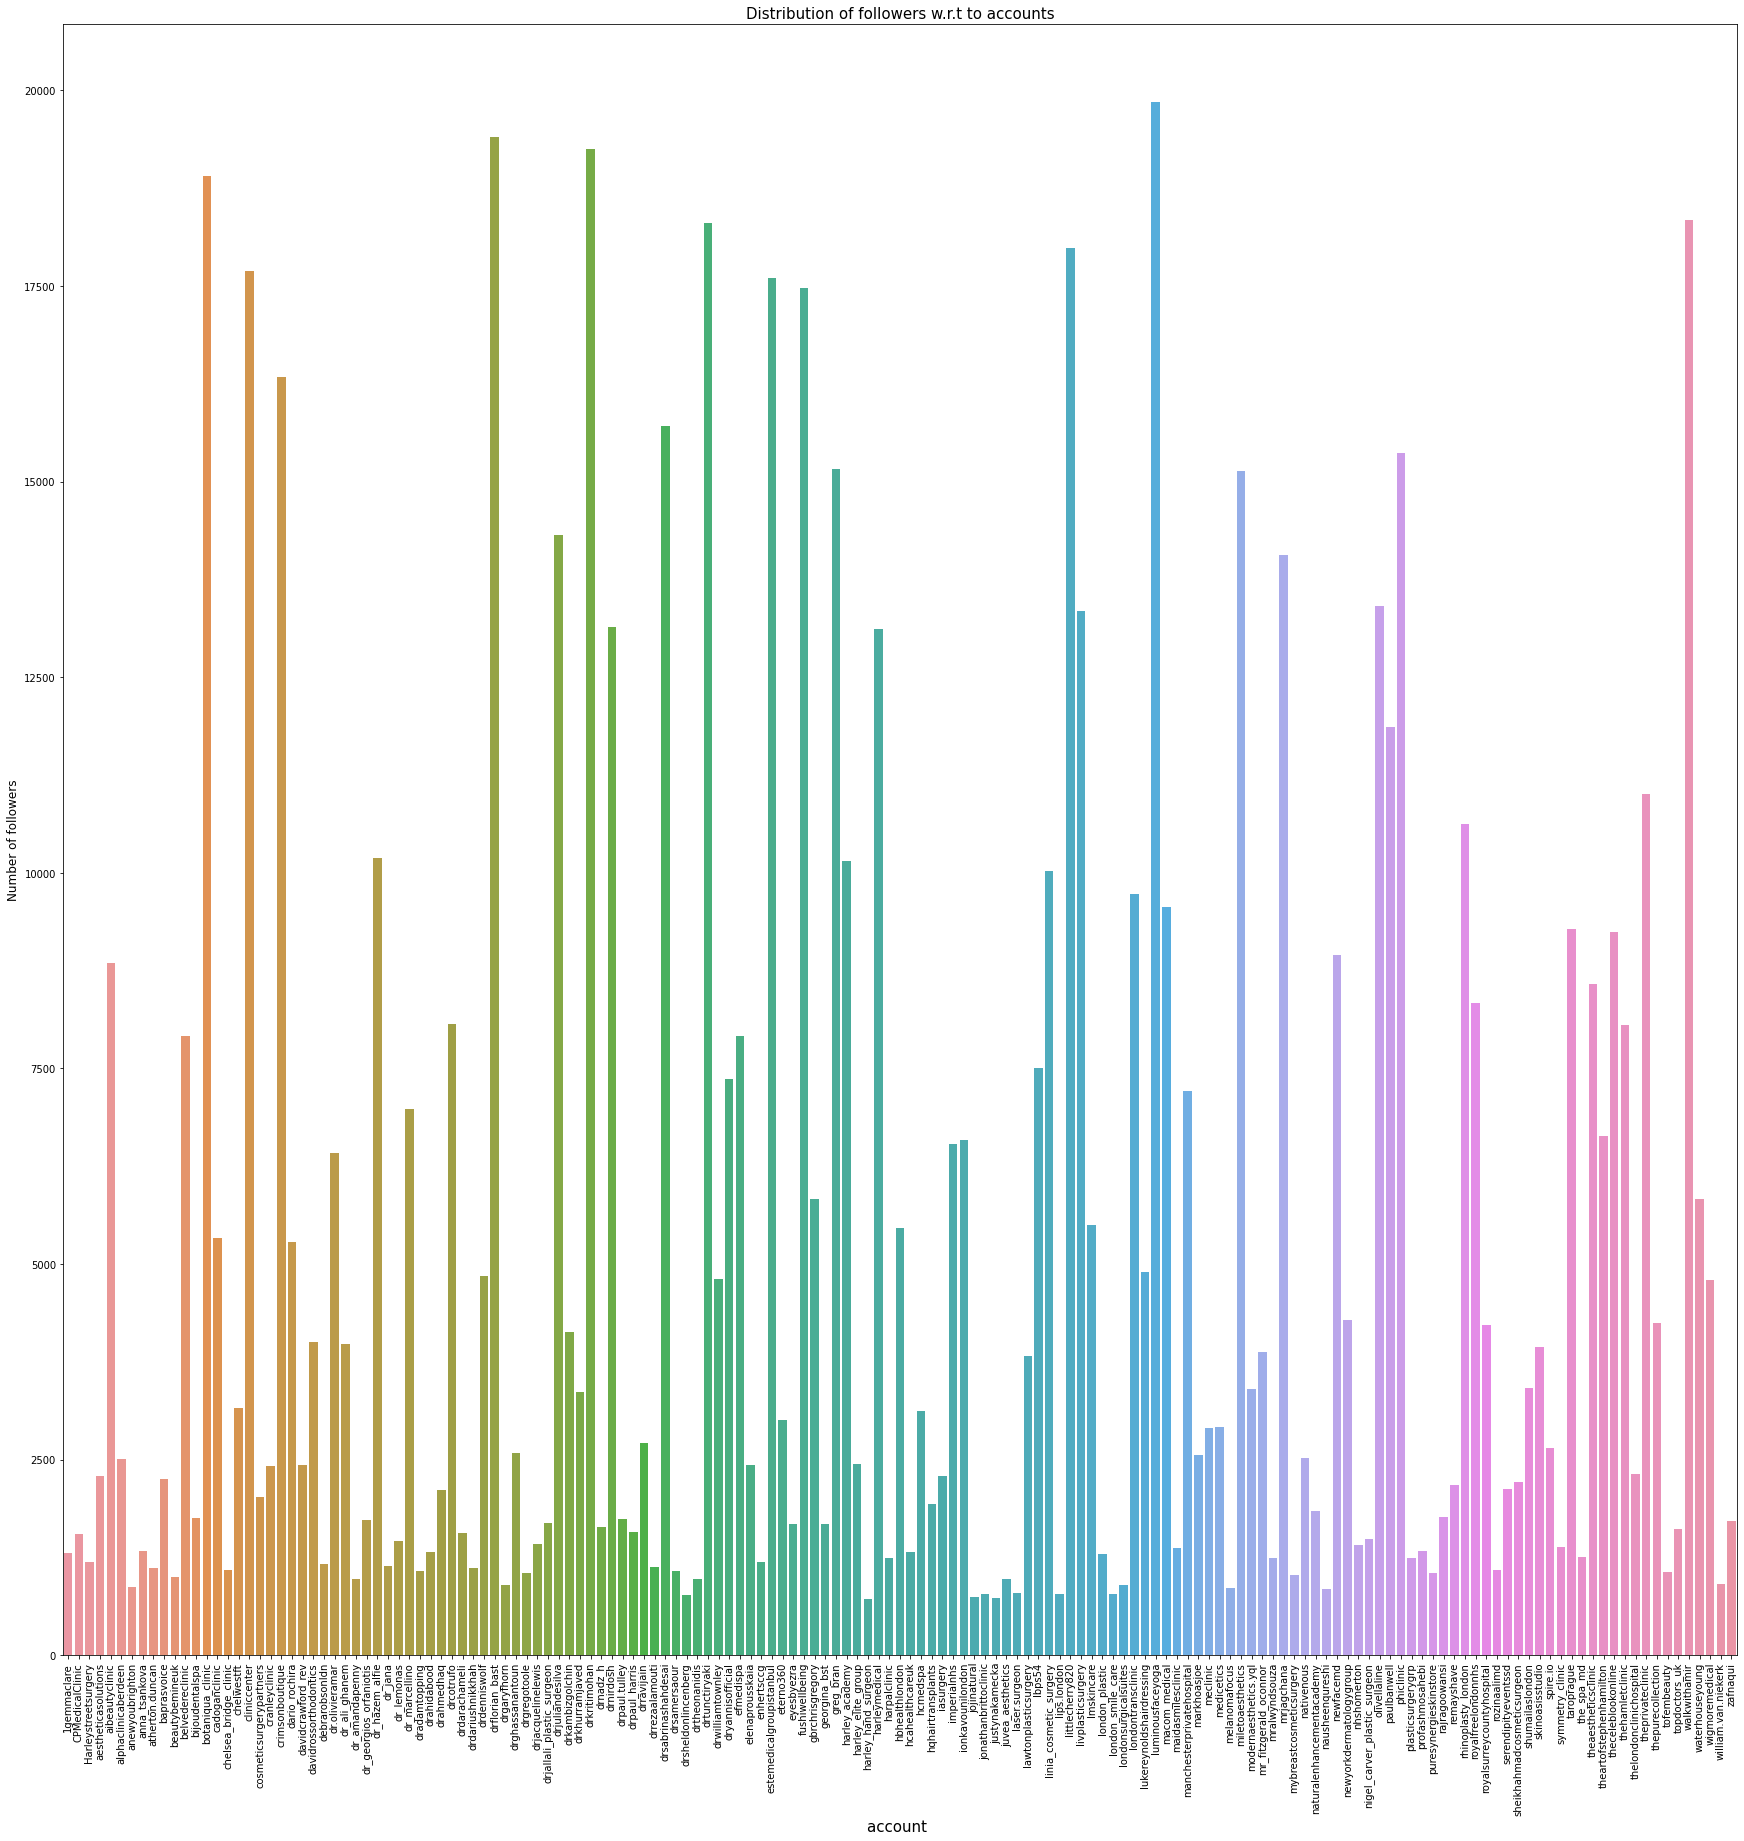

In [21]:
countfollowers=df.groupby("account")["followers"].aggregate(np.max).reset_index()
plt.figure(figsize=(30,30))
sns.barplot(countfollowers.account,countfollowers.followers,)
plt.ylabel('Number of followers',fontsize=12)
plt.xlabel('account ',fontsize=15)
plt.title('Distribution of followers w.r.t to accounts',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()




We have removed the outliers by using the quartile ranges

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


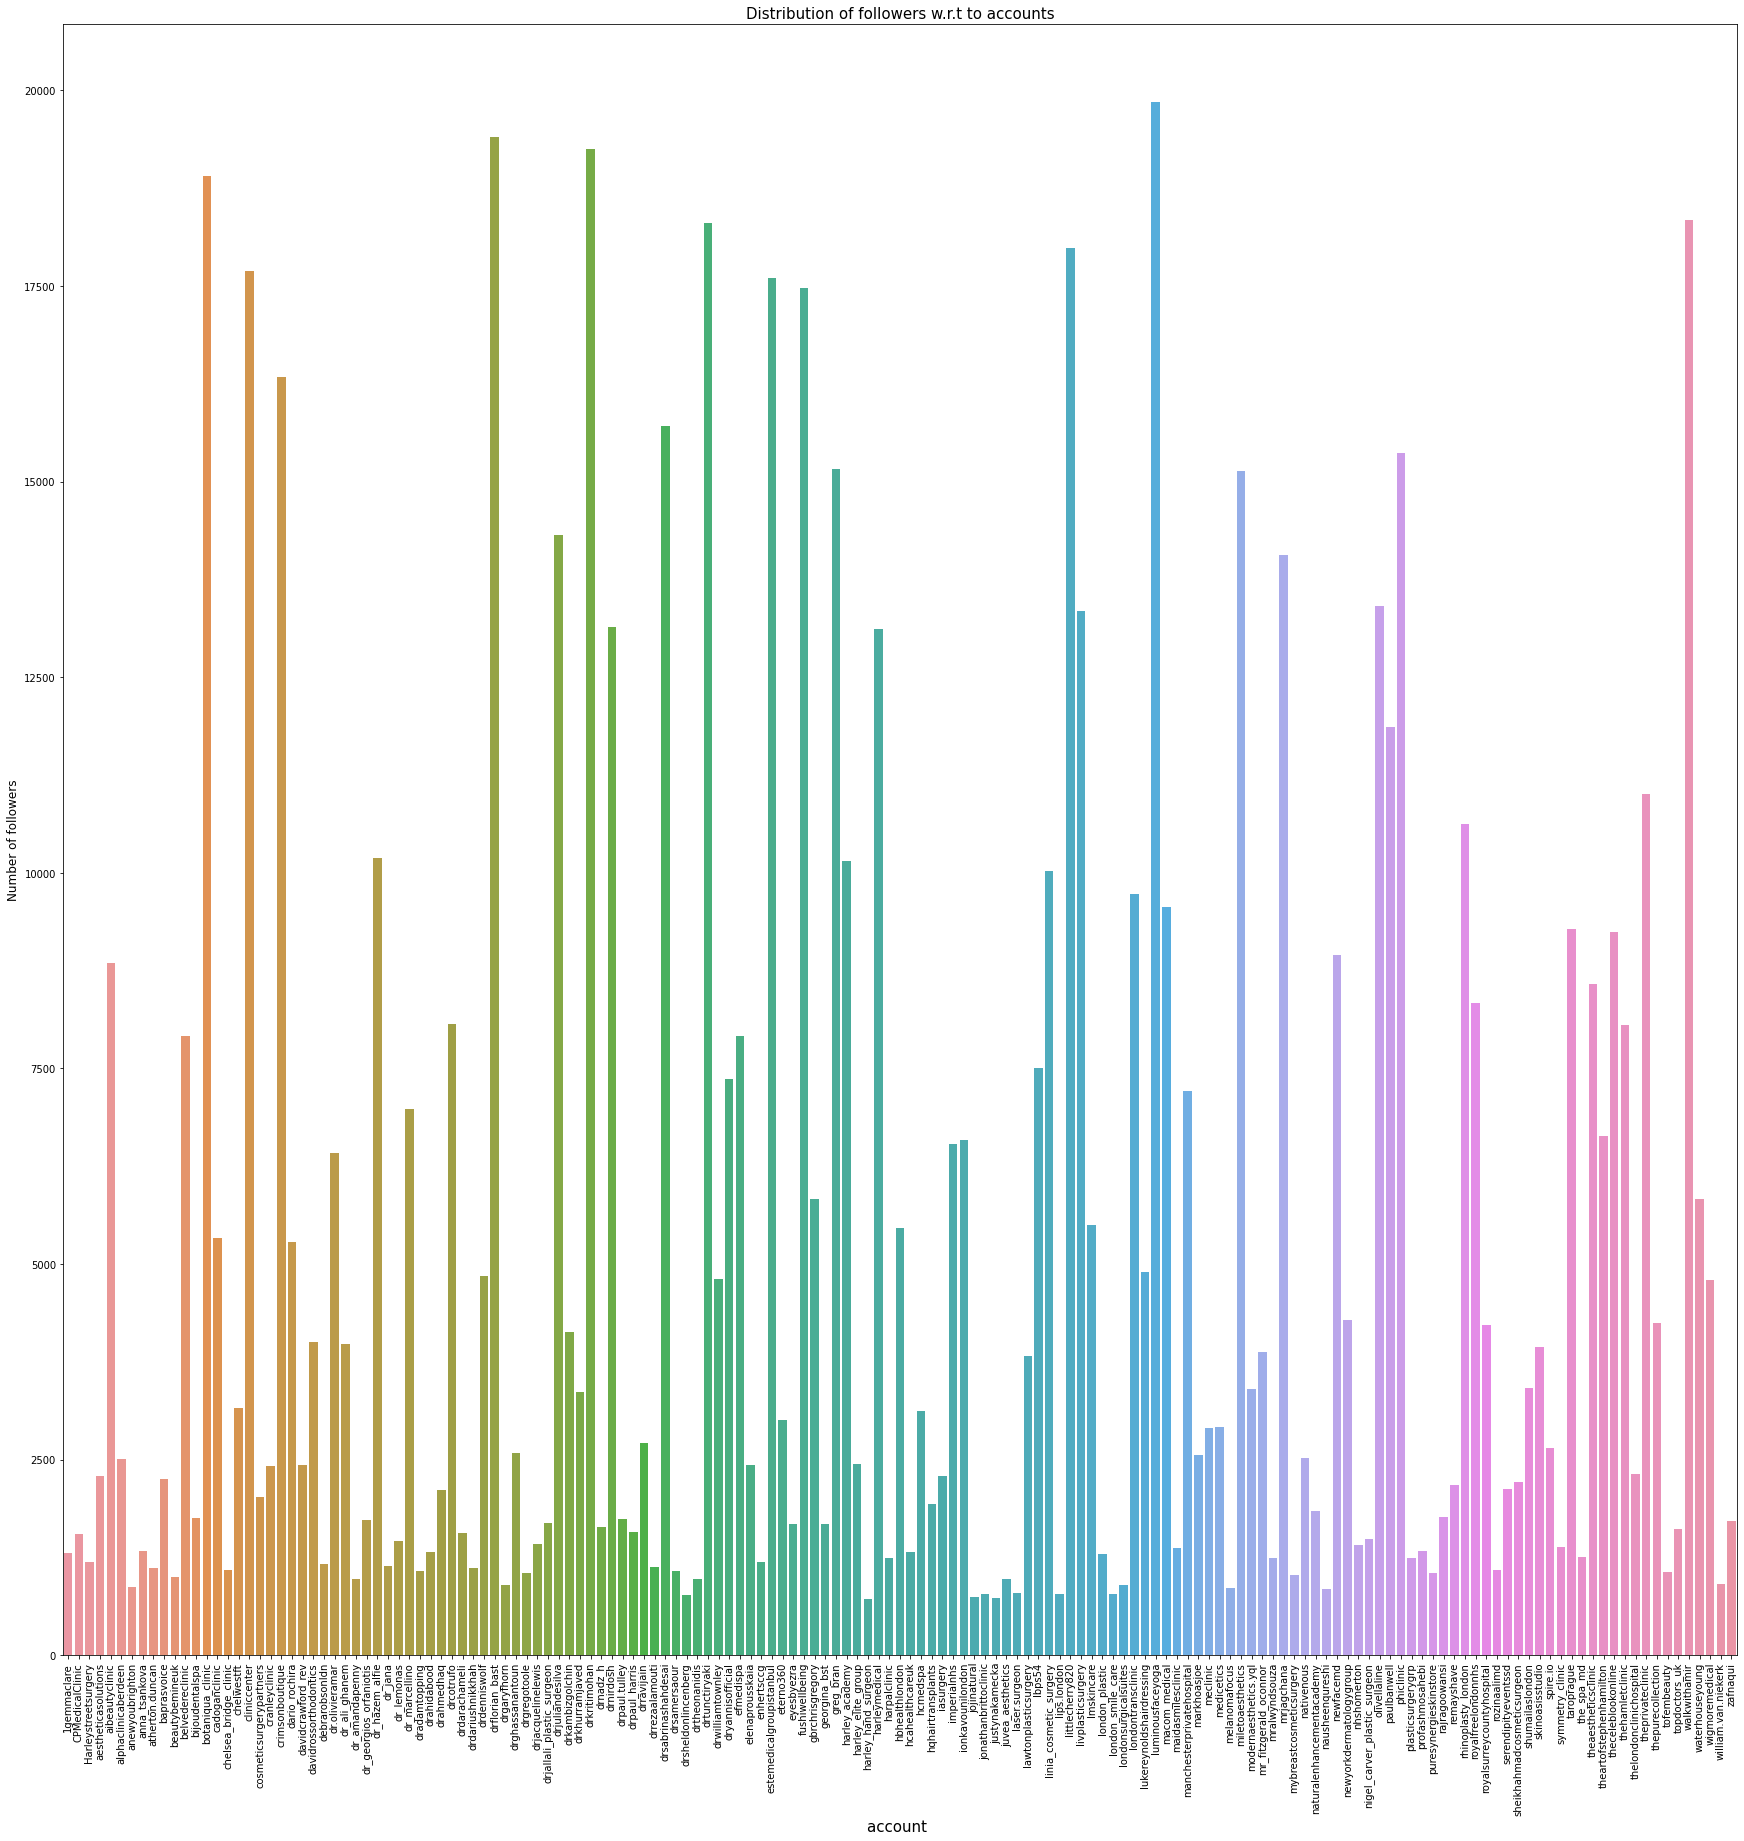

In [22]:
countfollowers=df.groupby("account")["followers"].aggregate(np.max).reset_index()
followers=countfollowers.followers.value_counts()
account=countfollowers.account.value_counts()

plt.figure(figsize=(30,30))
sns.barplot(countfollowers.account,countfollowers.followers,)
plt.ylabel('Number of followers',fontsize=12)
plt.xlabel('account ',fontsize=15)
plt.title('Distribution of followers w.r.t to accounts',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

###Distribution of users w.r.t to following

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


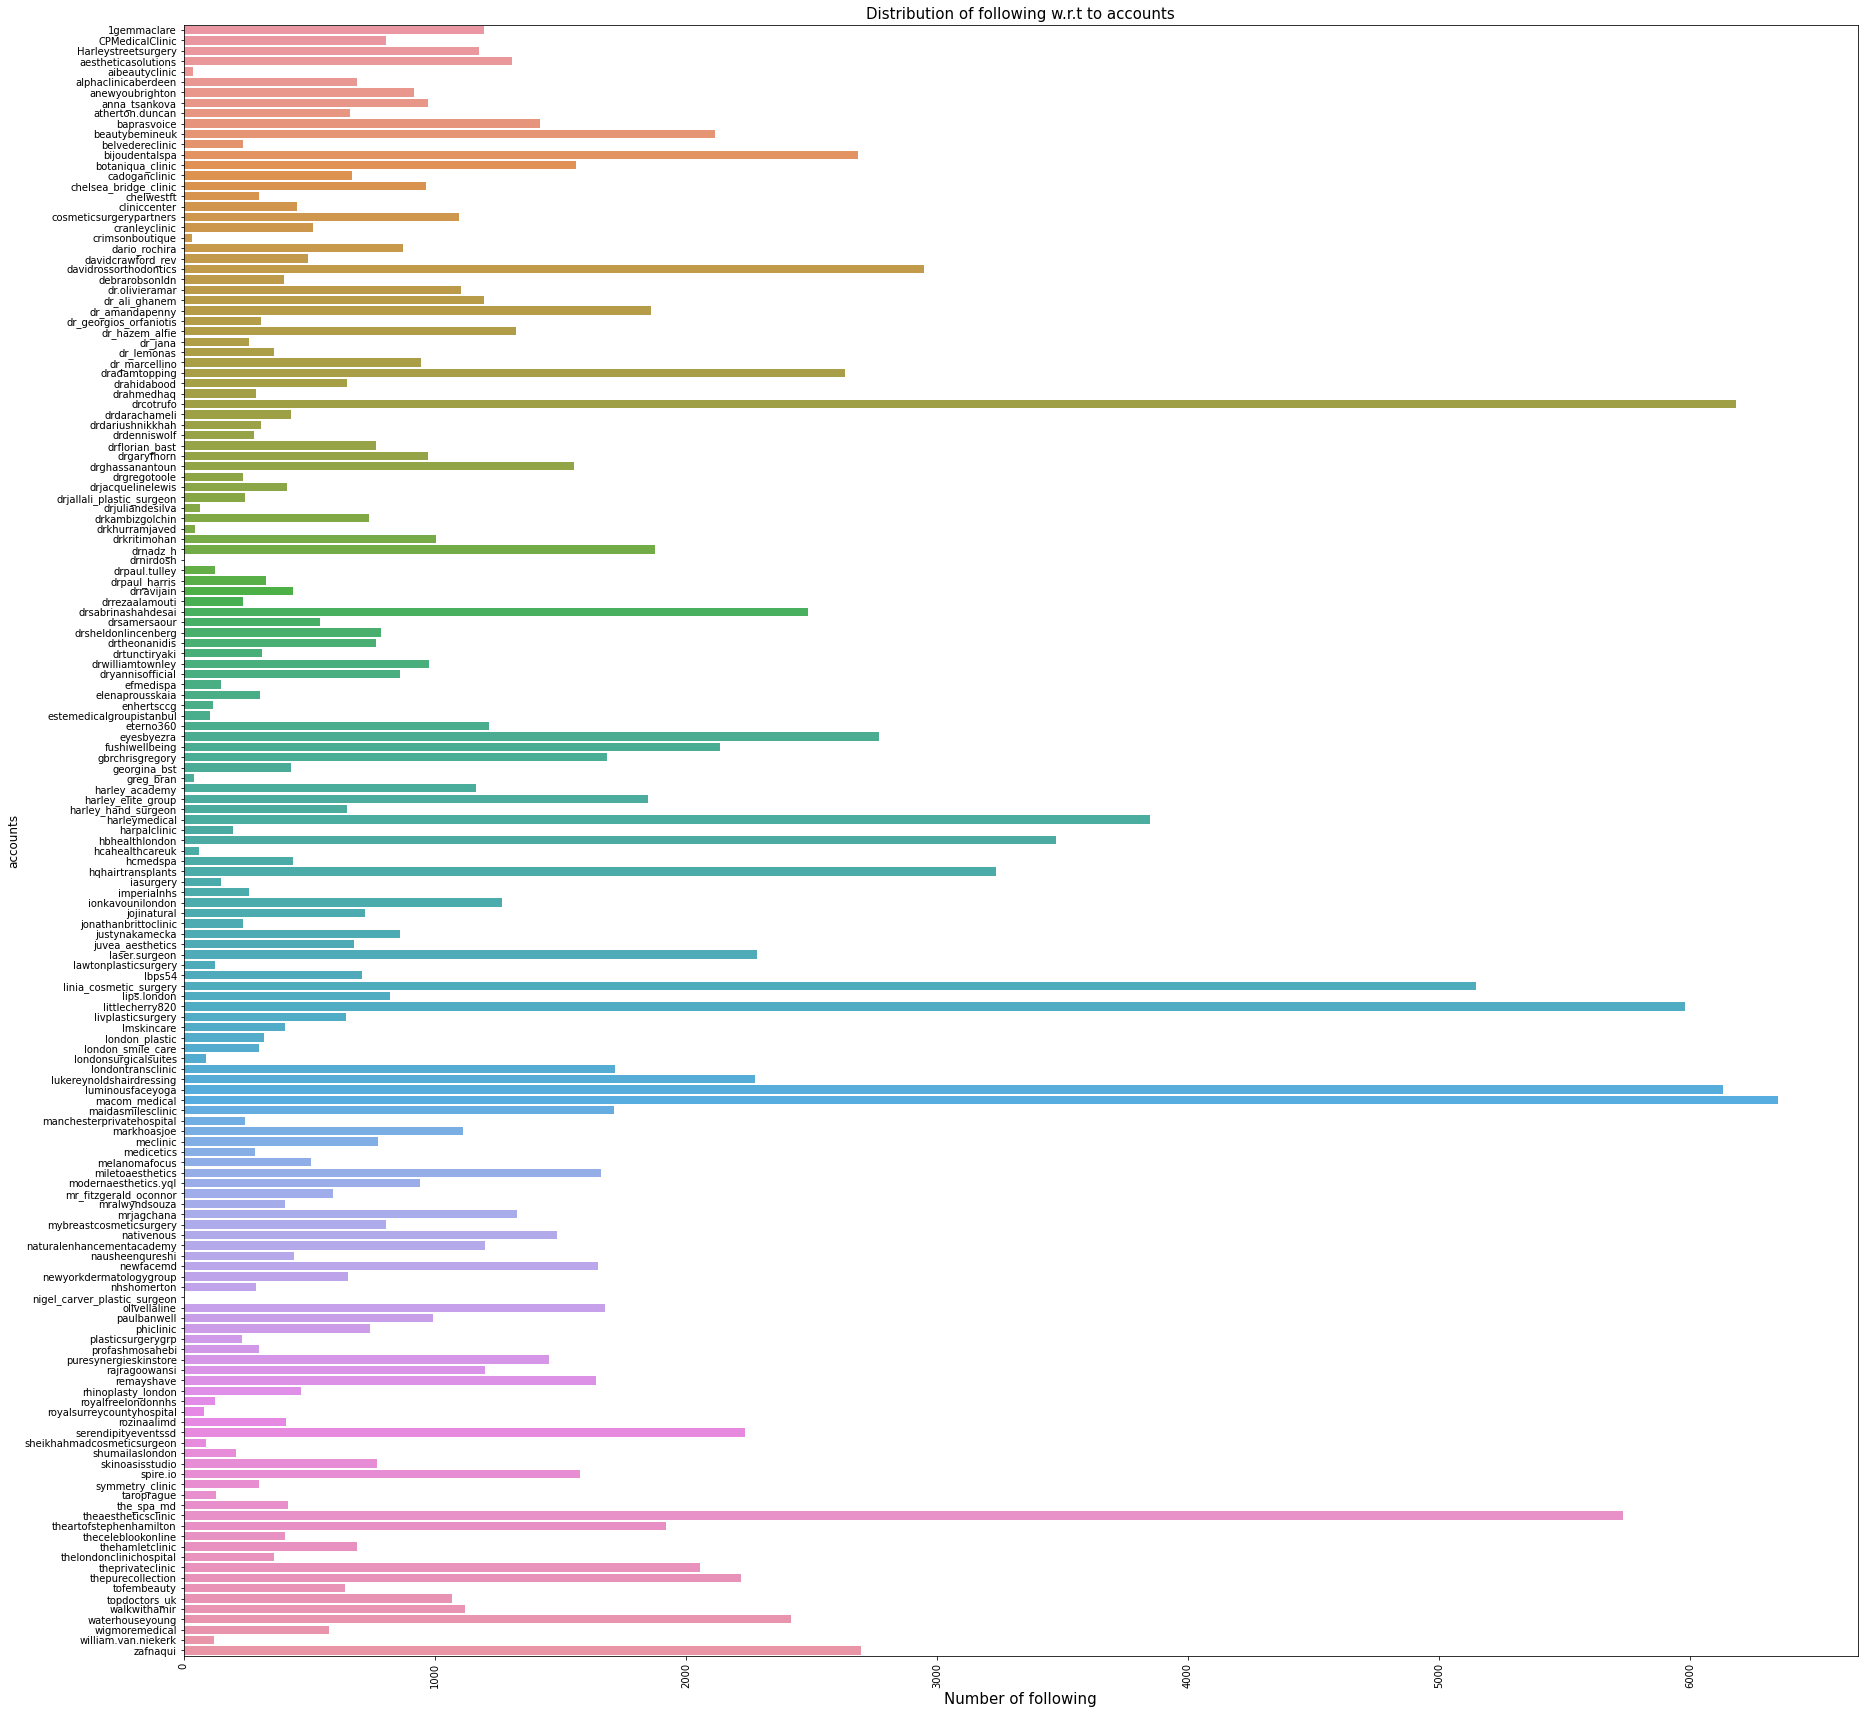

In [23]:
countfollowing=df.groupby("account")["following"].aggregate(np.max).reset_index()
# countfollowing.plot(x = "account", y = "following", kind = "bar",colormap='Paired')
plt.figure(figsize=(30,30))
sns.barplot(countfollowing.following,countfollowing.account)
plt.ylabel('accounts',fontsize=12)
plt.xlabel('Number of following',fontsize=15)
plt.title('Distribution of following w.r.t to accounts',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

###Distribution of users w.r.t to total posts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


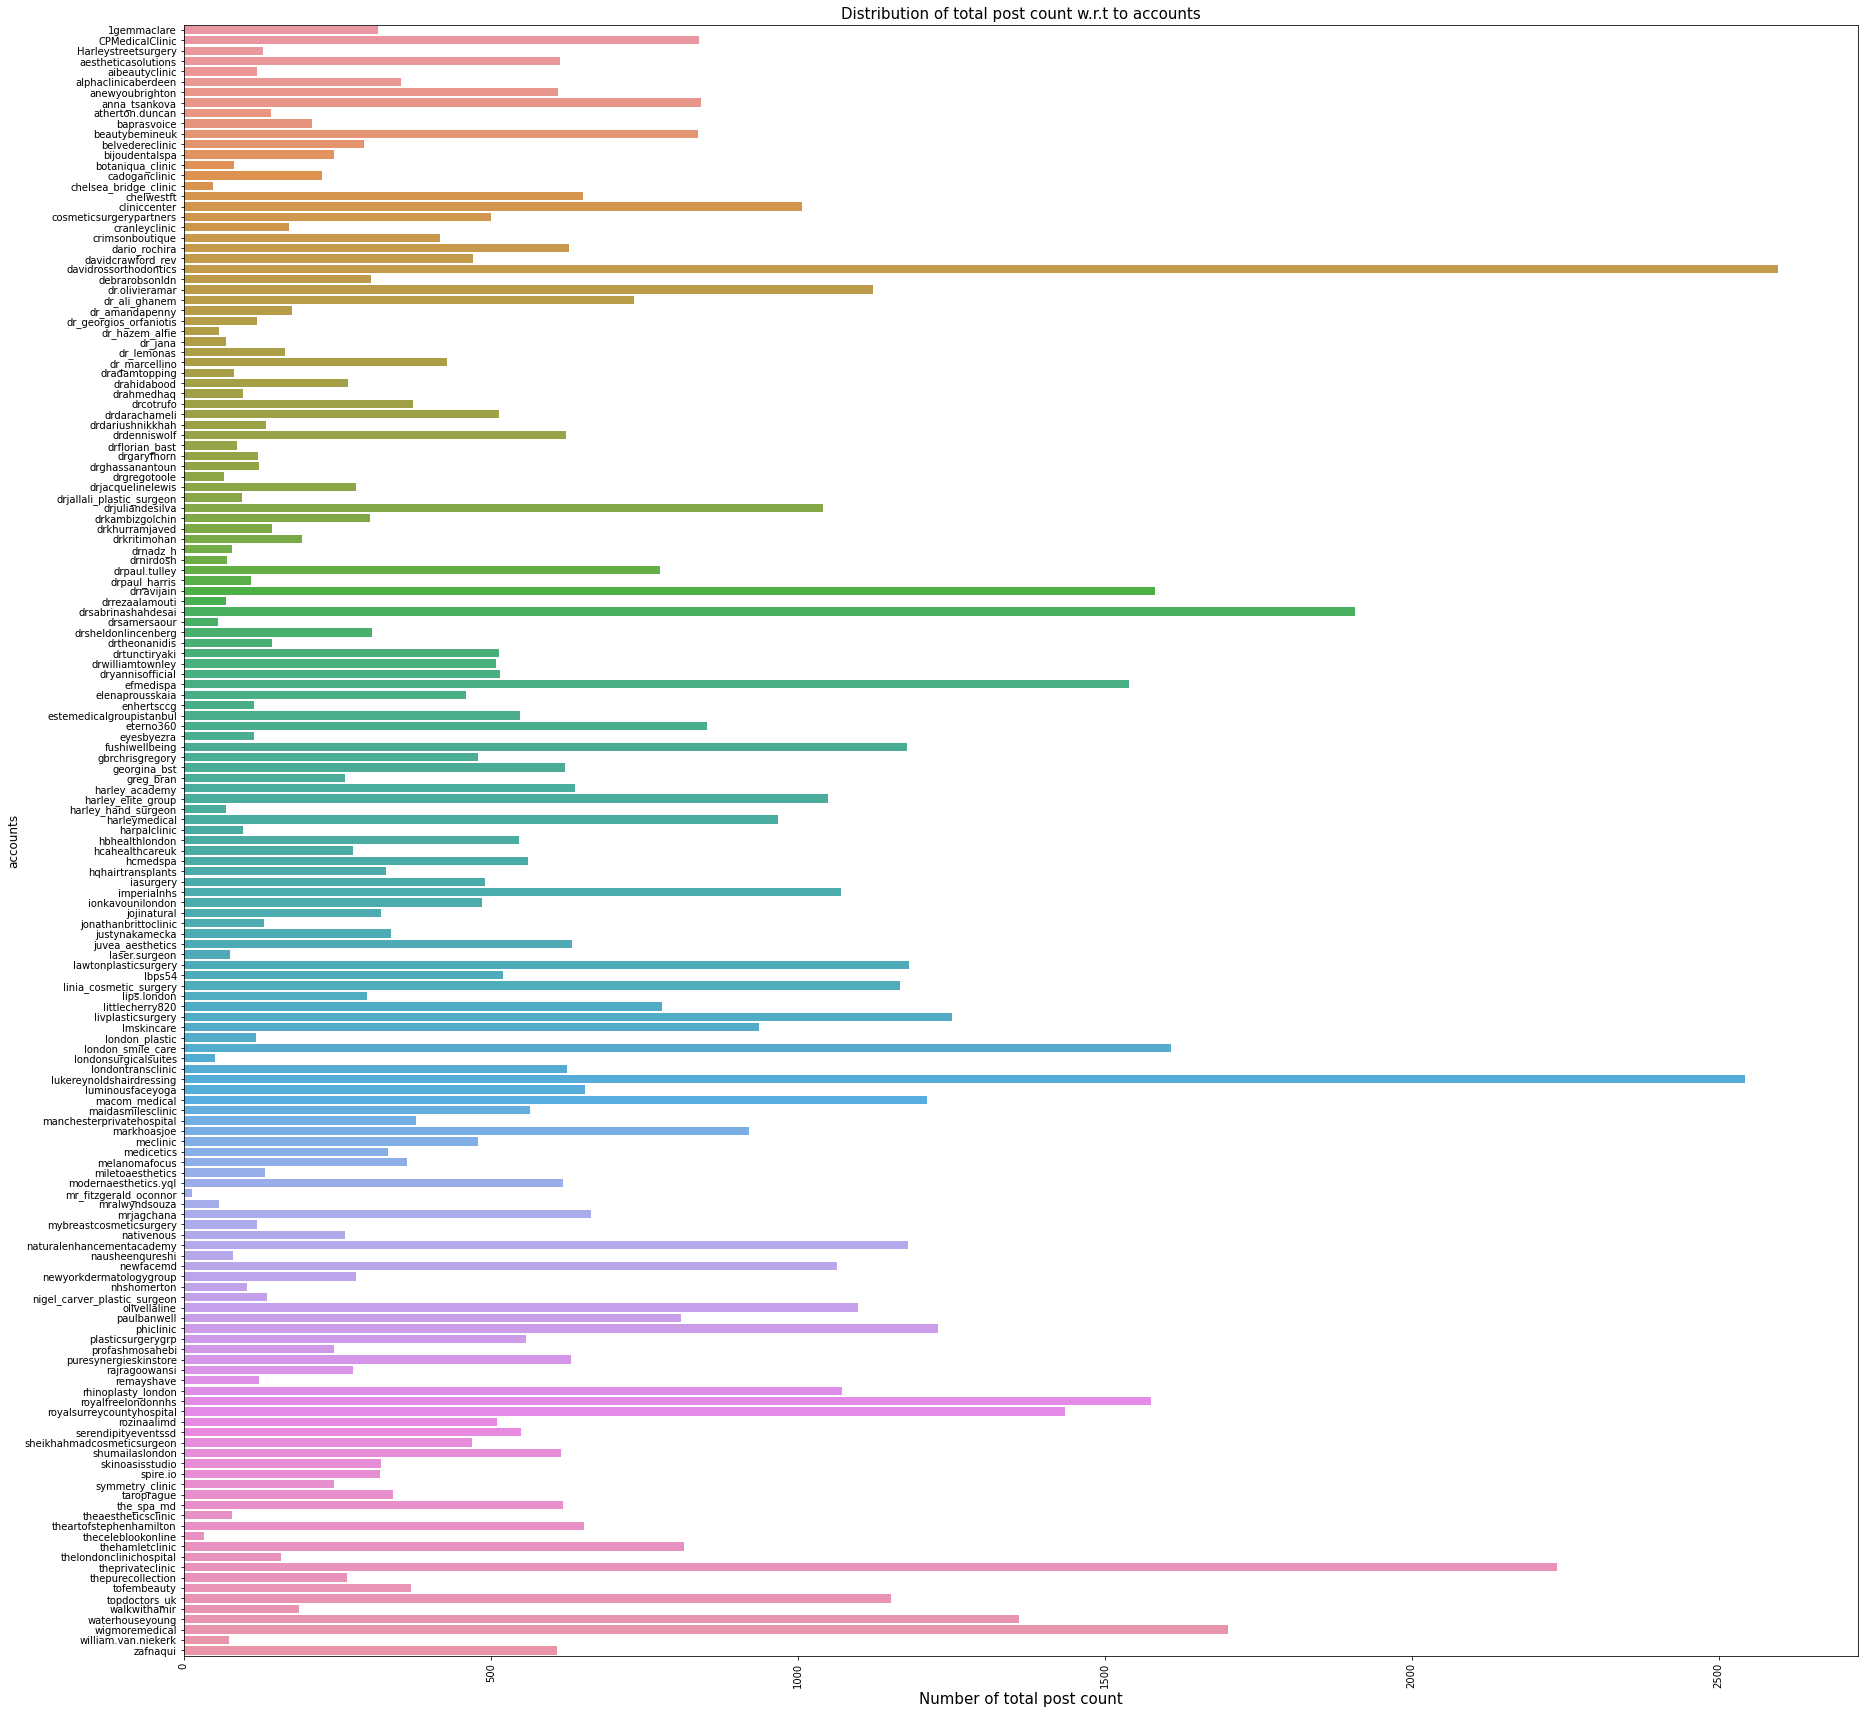

In [24]:
countPost_Count=df.groupby("account")["posts_count"].aggregate(np.max).reset_index()
plt.figure(figsize=(30,30))
sns.barplot(countPost_Count.posts_count,countPost_Count.account)
plt.ylabel('accounts',fontsize=12)
plt.xlabel('Number of total post count',fontsize=15)
plt.title('Distribution of total post count w.r.t to accounts',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [25]:
df.shape

(40595, 20)

In [26]:
df['likes'].max()

8821.0

In [27]:
df.caption.index

Int64Index([  207,   208,   209,   210,   211,   212,   213,   214,   215,
              216,
            ...
            58558, 58559, 58560, 58561, 58562, 58563, 58564, 58565, 58566,
            58567],
           dtype='int64', length=40595)

###Distribution of posts w.r.t to likes

In [28]:
# plt.figure(figsize=(20,20))
# sns.barplot(df.caption.index,df.likes)
# plt.ylabel('Number of likes',fontsize=12)
# plt.xlabel('captions',fontsize=15)
# plt.title('Distribution of likes vs captions',fontsize=15)
# plt.xticks(rotation='vertical')
# plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


KeyboardInterrupt: ignored

<Figure size 1440x1440 with 0 Axes>

**What Day Of The Week User posts?**

In [29]:
countDow=df['Dow'].value_counts()
countDow

Wednesday    7723
Thursday     7702
Tuesday      7559
Monday       6809
Sunday       5732
Saturday     5010
Friday         60
Name: Dow, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

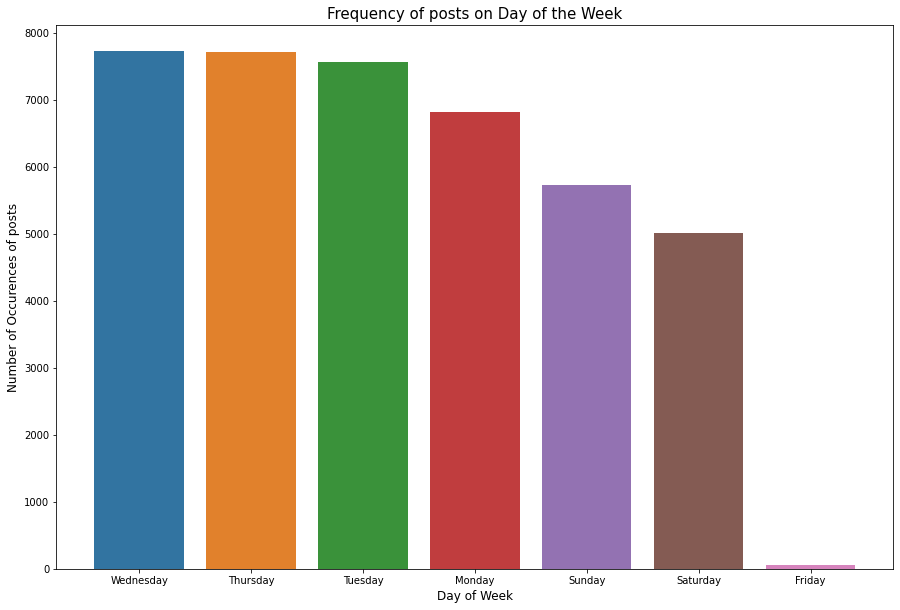

In [30]:
countDow=df['Dow'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(countDow.index,countDow.values)
plt.ylabel('Number of Occurences of posts',fontsize=12)
plt.xlabel('Day of Week',fontsize=12)
plt.title('Frequency of posts on Day of the Week',fontsize=15)
# plt.xticks(ticks=countDow.index,rotation='vertical')
plt.plot()

As from the above bar plot most of the time user is active on tuesday and Saturday.So it's likely high chance to post on that time of the day

**In which Hour user posts most ?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


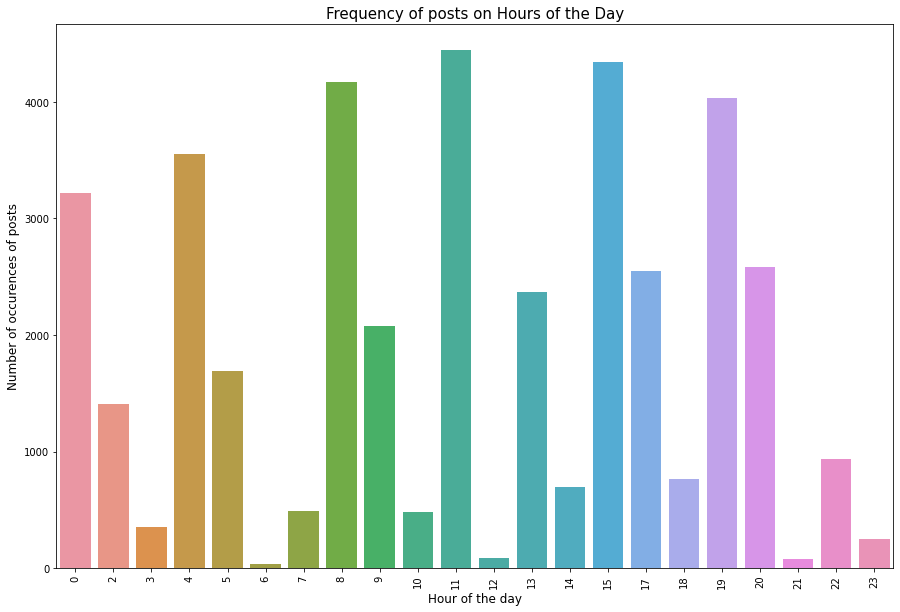

In [31]:
countHour=df['Hod'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(countHour.index,countHour.values)
plt.ylabel('Number of occurences of posts',fontsize=12)
plt.xlabel('Hour of the day',fontsize=12)
plt.title('Frequency of posts on Hours of the Day',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

As from the above bar plot most of the time user is active on 4 ,7 and 8 pm.So this can be the right time to post on instagram 

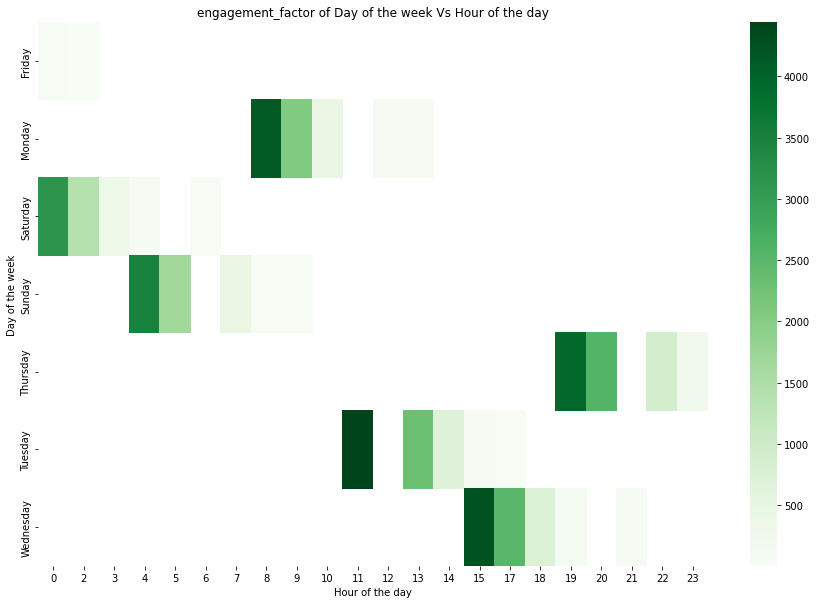

In [32]:
grp = df.groupby(['Dow','Hod'])['engagement_factor'].aggregate('count').reset_index()
grp = grp.pivot(index='Dow',columns='Hod',values='engagement_factor')
plt.figure(figsize=(15,10))
sns.heatmap(grp,cmap='Greens')
plt.title("engagement_factor of Day of the week Vs Hour of the day")
plt.xlabel('Hour of the day')
plt.ylabel('Day of the week')
plt.show()

This Heatmap tells everything, Lot of users mostly posts on Tuesday at 19' clock and Saturday at  16'clock.

##Exploration about numerical features

In [33]:
df.dtypes

id                    float64
external_url           object
followers             float64
posts_count           float64
following             float64
profile_image_link     object
likes                 float64
image_url              object
url                    object
comments              float64
thumbnails             object
account                object
hashtags               object
biography              object
caption                object
profile                object
Dow                    object
Hod                     int64
Date                   object
engagement_factor     float64
dtype: object

In [34]:
a=list(df.select_dtypes(['int']).columns)
b=list(df.select_dtypes(['float']).columns)

c=a+b

In [35]:
df1 = pd.DataFrame(df, columns=c)
df1

,Hod,id,followers,posts_count,following,likes,comments,engagement_factor
207,19,2.770000e+18,2444.0,1049.0,1848.0,17.0,0.0,0.00
208,19,2.770000e+18,2444.0,1049.0,1848.0,14.0,0.0,0.00
209,19,2.760000e+18,2444.0,1049.0,1848.0,10.0,0.0,0.00
210,19,2.760000e+18,2444.0,1049.0,1848.0,10.0,0.0,0.00
211,19,2.750000e+18,2444.0,1049.0,1848.0,34.0,5.0,0.07
...,...,...,...,...,...,...,...,...
58563,5,1.900000e+18,8945.0,1064.0,1649.0,19.0,1.0,0.00
58564,5,1.900000e+18,8945.0,1064.0,1649.0,43.0,2.0,0.01
58565,5,1.900000e+18,8945.0,1064.0,1649.0,61.0,4.0,0.03
58566,5,1.900000e+18,8945.0,1064.0,1649.0,35.0,2.0,0.01


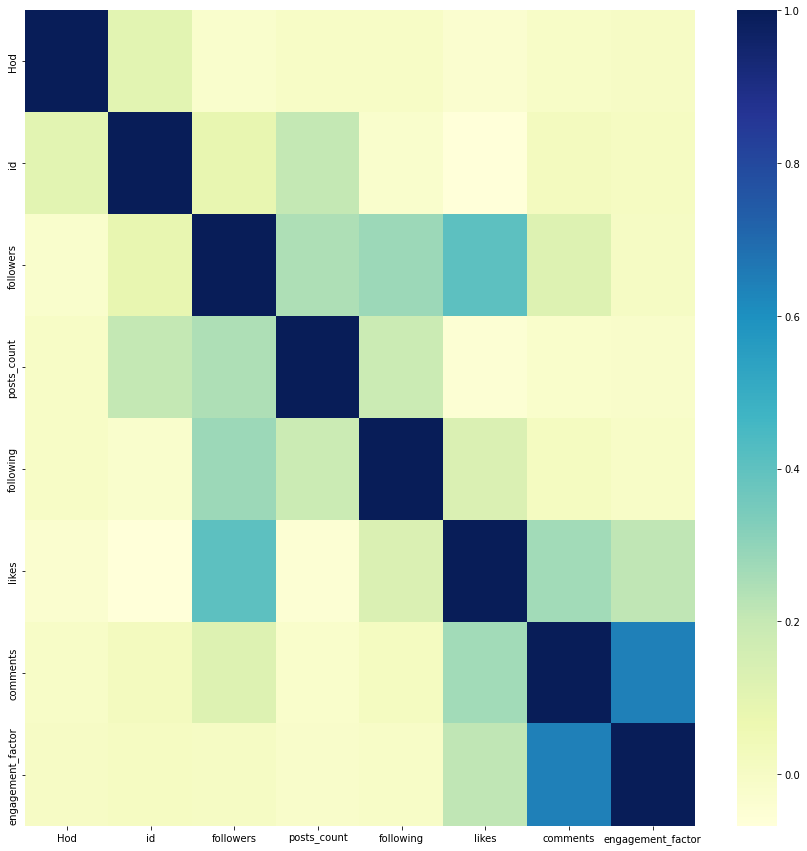

In [36]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),cmap="YlGnBu")
plt.show()

This shows there is a correlation between the below core
1. likes & comments 
2. post_count and followers 
3. likes & followers

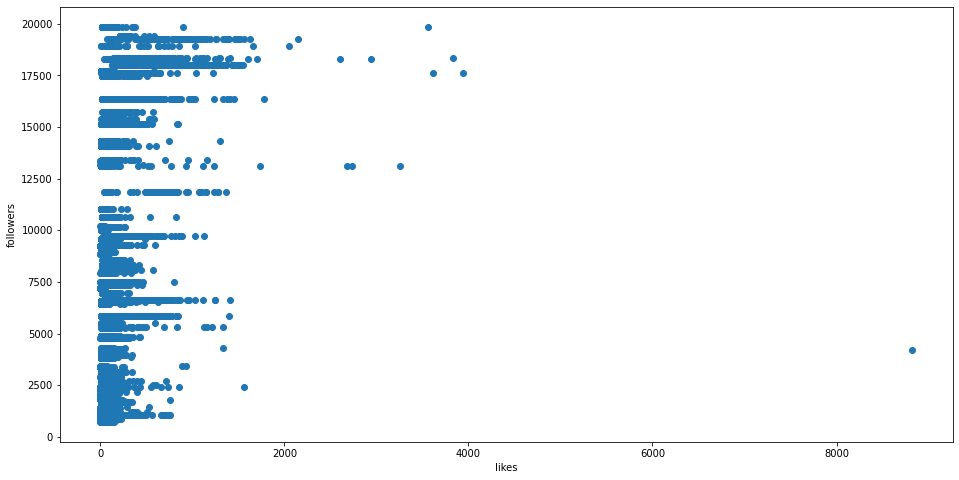

In [37]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['likes'], df['followers'])
ax.set_xlabel('likes')
ax.set_ylabel('followers')
plt.show()

With the increasing number of followers the number of likes increases

###Distribution of likes vs comments 

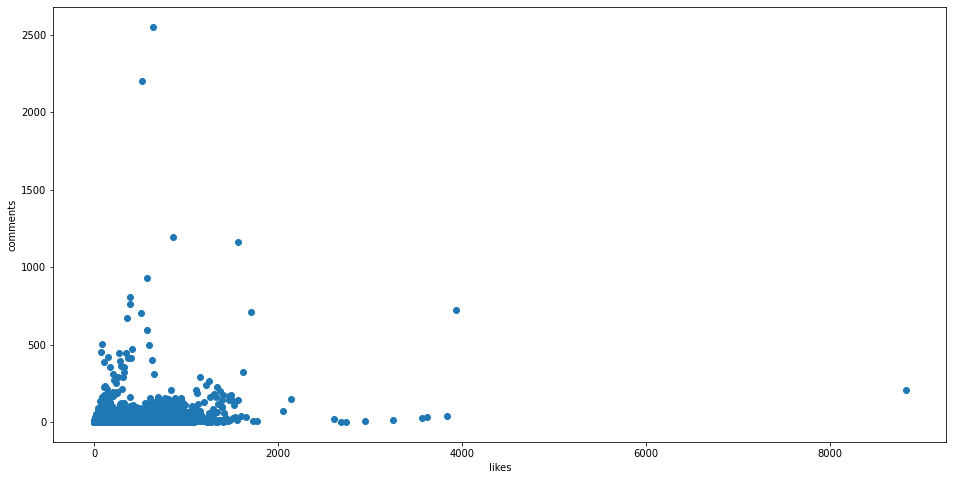

In [38]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['likes'], df['comments'])
ax.set_xlabel('likes')
ax.set_ylabel('comments')
plt.show()

###Distribution of racyScore Vs adultScore

In [39]:
# fig, ax = plt.subplots(figsize=(16,8))
# ax.scatter(df['racyScore'], df['adultScore'])
# ax.set_xlabel('racyScore')
# ax.set_ylabel('adultScore')
# plt.show()

In [40]:
df1=df

#Features Engineering

##User History Features

Average engagement rates likes

##Average Likes's Features

Average number of likes of k most recent posts of the account for different values of k

In [41]:
df['account'].value_counts().min()
df['account'].value_counts().max()

365

In [42]:
average=df.groupby(by=['account','likes'])['Date'].aggregate('max').to_frame('u_timestamp').reset_index()
average

,account,likes,u_timestamp
0,1gemmaclare,7.0,1970-06-15
1,1gemmaclare,9.0,1970-06-18
2,1gemmaclare,11.0,1970-06-20
3,1gemmaclare,12.0,1970-06-18
4,1gemmaclare,13.0,1970-06-20
...,...,...,...
12978,zafnaqui,106.0,1970-06-30
12979,zafnaqui,111.0,1970-06-30
12980,zafnaqui,112.0,1970-07-02
12981,zafnaqui,120.0,1970-06-28


In [43]:
average['account'].value_counts()

littlecherry820            296
drtunctiryaki              276
crimsonboutique            266
londontransclinic          239
theartofstephenhamilton    237
                          ... 
anewyoubrighton             20
drkhurramjaved              15
londonsurgicalsuites        13
mr_fitzgerald_oconnor       11
theceleblookonline           9
Name: account, Length: 157, dtype: int64

In [44]:
Average_likes=average.groupby(by=['account'])['likes'].aggregate('mean').to_frame('Average_Likes').reset_index()

In [45]:
Average_likes

,account,Average_Likes
0,1gemmaclare,57.670330
1,CPMedicalClinic,51.932432
2,Harleystreetsurgery,76.000000
3,aestheticasolutions,20.833333
4,aibeautyclinic,28.166667
...,...,...
152,walkwithamir,531.893082
153,waterhouseyoung,31.538462
154,wigmoremedical,22.170732
155,william.van.niekerk,25.906250


#Recent Likes

The exact number of likes acheived by the most recent published posts

In [46]:
recent_likes=average.groupby(by=['account'])['likes'].aggregate('max').to_frame('u_recent_likes').reset_index()
recent_likes

,account,u_recent_likes
0,1gemmaclare,132.0
1,CPMedicalClinic,130.0
2,Harleystreetsurgery,510.0
3,aestheticasolutions,50.0
4,aibeautyclinic,97.0
...,...,...
152,walkwithamir,3837.0
153,waterhouseyoung,98.0
154,wigmoremedical,60.0
155,william.van.niekerk,54.0


#Time feature

###When the user posts on instagram probablity of day of the week user can gets most of the likes

In [47]:
#day of the week user likes the most
dow=df.groupby(by=['account','likes'])['Dow'].aggregate(lambda x:stats.mode(x)[0]).to_frame('Dow_u_likes_the_most').reset_index()
dow.iloc[:]
# dow.loc[dow['account'].isin(['lips.london'])]

,account,likes,Dow_u_likes_the_most
0,1gemmaclare,7.0,Monday
1,1gemmaclare,9.0,Thursday
2,1gemmaclare,11.0,Saturday
3,1gemmaclare,12.0,Thursday
4,1gemmaclare,13.0,Saturday
...,...,...,...
12978,zafnaqui,106.0,Tuesday
12979,zafnaqui,111.0,Tuesday
12980,zafnaqui,112.0,Thursday
12981,zafnaqui,120.0,Sunday


choose the maximum likes

In [48]:
dow_=dow.groupby(by=['account','Dow_u_likes_the_most'])['likes'].aggregate('max').to_frame('dow_user_gets_maximum_likes').reset_index()
dow_
# dow_.loc[dow_['account'].isin(['lips.london'])]

,account,Dow_u_likes_the_most,dow_user_gets_maximum_likes
0,1gemmaclare,Monday,123.0
1,1gemmaclare,Saturday,88.0
2,1gemmaclare,Sunday,120.0
3,1gemmaclare,Thursday,94.0
4,1gemmaclare,Tuesday,132.0
...,...,...,...
871,zafnaqui,Saturday,99.0
872,zafnaqui,Sunday,120.0
873,zafnaqui,Thursday,112.0
874,zafnaqui,Tuesday,111.0


###Hour of the week user gets likes the most

When the user posts on instagram probablity of hour of the day user can gets most of the likes

In [49]:
#HOUR of the week user likes the most
hod=df.groupby(by=['account','likes'])['Hod'].aggregate(lambda x:stats.mode(x)[0]).to_frame('Hod_u_max_likes_hour').reset_index()
hod.iloc[:]
# len(hod.account.unique())

,account,likes,Hod_u_max_likes_hour
0,1gemmaclare,7.0,12
1,1gemmaclare,9.0,23
2,1gemmaclare,11.0,3
3,1gemmaclare,12.0,23
4,1gemmaclare,13.0,3
...,...,...,...
12978,zafnaqui,106.0,13
12979,zafnaqui,111.0,13
12980,zafnaqui,112.0,20
12981,zafnaqui,120.0,5


In [50]:
hod_=hod.groupby(by=['account'])['likes'].aggregate('max').to_frame('HoD_u_most_like_values').reset_index()
hod_
# dow_.loc[dow_['account'].isin(['lips.london'])]

,account,HoD_u_most_like_values
0,1gemmaclare,132.0
1,CPMedicalClinic,130.0
2,Harleystreetsurgery,510.0
3,aestheticasolutions,50.0
4,aibeautyclinic,97.0
...,...,...
152,walkwithamir,3837.0
153,waterhouseyoung,98.0
154,wigmoremedical,60.0
155,william.van.niekerk,54.0


In [51]:
# hod_['Hod_u_max_likes_hour_']=hod.set_index('account').lookup(hod_.account,hod_.HoD_u_most_like_values)

In [52]:
HoD_=hod.groupby(by=['account'])['likes'].aggregate('max').to_frame('HoD_u_most_like_values')
HoD_

,HoD_u_most_like_values
account,
1gemmaclare,132.0
CPMedicalClinic,130.0
Harleystreetsurgery,510.0
aestheticasolutions,50.0
aibeautyclinic,97.0
...,...
walkwithamir,3837.0
waterhouseyoung,98.0
wigmoremedical,60.0


In [53]:
# merged_data= HoD_.merge(hod, on=["account","HoD_u_most_like_values"])

In [54]:
# HoD_ = pd.merge(hod,HoD_,  how='left', left_on=['HoD_u_most_like_values', 'account'], right_on = ['Hod_u_max_likes_hour', 'account'])
# HoD_

# # users=pd.merge(HoD_,hod,on=['account'],how='left')

###Combining all the time features

In [55]:
HoD_=HoD_.merge(dow_,on='account',how='left')
HoD_

,account,HoD_u_most_like_values,Dow_u_likes_the_most,dow_user_gets_maximum_likes
0,1gemmaclare,132.0,Monday,123.0
1,1gemmaclare,132.0,Saturday,88.0
2,1gemmaclare,132.0,Sunday,120.0
3,1gemmaclare,132.0,Thursday,94.0
4,1gemmaclare,132.0,Tuesday,132.0
...,...,...,...,...
871,zafnaqui,122.0,Saturday,99.0
872,zafnaqui,122.0,Sunday,120.0
873,zafnaqui,122.0,Thursday,112.0
874,zafnaqui,122.0,Tuesday,111.0


#Engagement factor

In [56]:
# engagement_factor=df.groupby(by=['caption'])['engagement_factor'].aggregate('mean').to_frame('engagement_factor').reset_index()
# engagement_factor.iloc[:]

###combining all the three features into one 

In [57]:
Average_likes=Average_likes.merge(recent_likes,on='account',how='left')
Average_likes=Average_likes.merge(HoD_,on='account',how='left')
# Average_likes=Average_likes.merge(engagement_factor,on='account',how='left')
Average_likes

,account,Average_Likes,u_recent_likes,HoD_u_most_like_values,Dow_u_likes_the_most,dow_user_gets_maximum_likes
0,1gemmaclare,57.670330,132.0,132.0,Monday,123.0
1,1gemmaclare,57.670330,132.0,132.0,Saturday,88.0
2,1gemmaclare,57.670330,132.0,132.0,Sunday,120.0
3,1gemmaclare,57.670330,132.0,132.0,Thursday,94.0
4,1gemmaclare,57.670330,132.0,132.0,Tuesday,132.0
...,...,...,...,...,...,...
871,zafnaqui,55.942529,122.0,122.0,Saturday,99.0
872,zafnaqui,55.942529,122.0,122.0,Sunday,120.0
873,zafnaqui,55.942529,122.0,122.0,Thursday,112.0
874,zafnaqui,55.942529,122.0,122.0,Tuesday,111.0


# NLP Text-related features

There are many different features within the dataset that utilize text including biography, hashtags, location, and caption. For the purposes of our project we chose to focus on the caption because we were analyzing independent posts and wanted to use as much information about the post, not the poster, as possible.

In [58]:
!pip install -U textblob
# from textblob import TextBlob

TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. N

In [59]:
df1 = df1.astype(str)

In [60]:
from textblob import TextBlob


def sentiment_analysis(caption):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(caption):
   return TextBlob(caption).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 df1['TextBlob_Subjectivity'] =    df1['caption'].apply(getSubjectivity)
 df1 ['TextBlob_Polarity'] = df1['caption'].apply(getPolarity)


 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


 df1 ['TextBlob_Analysis'] = df1['TextBlob_Polarity'].apply(getAnalysis )
 return df1

In [61]:
# tex = "man violent happy"
# print(sentiment_analysis(tex))

In [62]:
df1.dtypes

id                    object
external_url          object
followers             object
posts_count           object
following             object
profile_image_link    object
likes                 object
image_url             object
url                   object
comments              object
thumbnails            object
account               object
hashtags              object
biography             object
caption               object
profile               object
Dow                   object
Hod                   object
Date                  object
engagement_factor     object
dtype: object

In [63]:
df1.head()

,id,external_url,followers,posts_count,following,profile_image_link,likes,image_url,url,comments,thumbnails,account,hashtags,biography,caption,profile,Dow,Hod,Date,engagement_factor
207,2.77e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,17.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZkGG8rqLOd/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#keoghreport', '#cheapandnasty', '#blackmark...",lphone2 07539173870 02074678407 harley elit gr...,did anyon read thetim articl black market boto...,Harley Elite Group,Thursday,19,1970-07-09,0.0
208,2.77e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,14.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZg0rLIq2fY/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#tweakment', '#tbt', '#throwbackthursday', '...",lphone2 07539173870 02074678407 harley elit gr...,We love dollyâ€™ style timeless beauti 70â€™ f...,Harley Elite Group,Thursday,19,1970-07-09,0.0
209,2.76e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,10.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZcT2YtqLub/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#restoreyouth', '#facialageing', '#cheekfill...",lphone2 07539173870 02074678407 harley elit gr...,the oge curv doubl sshape curvatur along cheek...,Harley Elite Group,Thursday,19,1970-07-09,0.0
210,2.76e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,10.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZZuNMDK7ro/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#lipstick', '#naturallips', '#training', '#m...",lphone2 07539173870 02074678407 harley elit gr...,lipstick naturallip train masterclass kiss fil...,Harley Elite Group,Thursday,19,1970-07-09,0.0
211,2.75e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,34.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CY6sFuDqMpa/,5.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#clinicalexcellence', '#meettheteam', '#cosm...",lphone2 07539173870 02074678407 harley elit gr...,how littl hump day introduct founder lead doct...,Harley Elite Group,Thursday,19,1970-07-09,0.07


In [64]:
# df1=df1["caption"].apply(lambda text: sentiment_analysis(text))

In [65]:
df1

,id,external_url,followers,posts_count,following,profile_image_link,likes,image_url,url,comments,thumbnails,account,hashtags,biography,caption,profile,Dow,Hod,Date,engagement_factor
207,2.77e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,17.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZkGG8rqLOd/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#keoghreport', '#cheapandnasty', '#blackmark...",lphone2 07539173870 02074678407 harley elit gr...,did anyon read thetim articl black market boto...,Harley Elite Group,Thursday,19,1970-07-09,0.0
208,2.77e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,14.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZg0rLIq2fY/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#tweakment', '#tbt', '#throwbackthursday', '...",lphone2 07539173870 02074678407 harley elit gr...,We love dollyâ€™ style timeless beauti 70â€™ f...,Harley Elite Group,Thursday,19,1970-07-09,0.0
209,2.76e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,10.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZcT2YtqLub/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#restoreyouth', '#facialageing', '#cheekfill...",lphone2 07539173870 02074678407 harley elit gr...,the oge curv doubl sshape curvatur along cheek...,Harley Elite Group,Thursday,19,1970-07-09,0.0
210,2.76e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,10.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZZuNMDK7ro/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#lipstick', '#naturallips', '#training', '#m...",lphone2 07539173870 02074678407 harley elit gr...,lipstick naturallip train masterclass kiss fil...,Harley Elite Group,Thursday,19,1970-07-09,0.0
211,2.75e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,34.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CY6sFuDqMpa/,5.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#clinicalexcellence', '#meettheteam', '#cosm...",lphone2 07539173870 02074678407 harley elit gr...,how littl hump day introduct founder lead doct...,Harley Elite Group,Thursday,19,1970-07-09,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58563,1.9e+18,https://newfacemd.com/,8945.0,1064.0,1649.0,https://instagram.fsco3-1.fna.fbcdn.net/v/t51....,19.0,https://instagram.fhyd2-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/BprbAs2HPrz/,1.0,"[{""src"":""https://instagram.fhyd2-1.fna.fbcdn.n...",newfacemd,"['#lipdoctor', '#lipenhancement', '#lipcorrect...",founder ceo jativamd jativadmd aesthet dentist...,thi result previou video inject 1 mL filler th...,Aesthetics,Sunday,5,1970-06-28,0.0
58564,1.9e+18,https://newfacemd.com/,8945.0,1064.0,1649.0,https://instagram.fsco3-1.fna.fbcdn.net/v/t51....,43.0,https://instagram.fhyd2-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/BpkuKlbHP9d/,2.0,"[{""src"":""https://instagram.fhyd2-1.fna.fbcdn.n...",newfacemd,"['#medspa', '#laserhairremoval', '#northmiami'...",founder ceo jativamd jativadmd aesthet dentist...,enhanc lip stubl natur way dlip elimin vã©rtic...,Aesthetics,Sunday,5,1970-06-28,0.01
58565,1.9e+18,https://newfacemd.com/,8945.0,1064.0,1649.0,https://instagram.fsco3-1.fna.fbcdn.net/v/t51....,61.0,https://scontent-frt3-1.cdninstagram.com/v/t51...,https://www.instagram.com/p/BpYY1ccHv55/,4.0,"[{""src"":""https://scontent-frt3-1.cdninstagram....",newfacemd,"['#weston', '#coralgables', '#hallandalebeach'...",founder ceo jativamd jativadmd aesthe

In [66]:
sentiment_analysis(df1['caption'])

,id,external_url,followers,posts_count,following,profile_image_link,likes,image_url,url,comments,thumbnails,account,hashtags,biography,caption,profile,Dow,Hod,Date,engagement_factor,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
207,2.77e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,17.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZkGG8rqLOd/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#keoghreport', '#cheapandnasty', '#blackmark...",lphone2 07539173870 02074678407 harley elit gr...,did anyon read thetim articl black market boto...,Harley Elite Group,Thursday,19,1970-07-09,0.0,0.488333,0.068333,Positive
208,2.77e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,14.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZg0rLIq2fY/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#tweakment', '#tbt', '#throwbackthursday', '...",lphone2 07539173870 02074678407 harley elit gr...,We love dollyâ€™ style timeless beauti 70â€™ f...,Harley Elite Group,Thursday,19,1970-07-09,0.0,0.575000,0.372222,Positive
209,2.76e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,10.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZcT2YtqLub/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#restoreyouth', '#facialageing', '#cheekfill...",lphone2 07539173870 02074678407 harley elit gr...,the oge curv doubl sshape curvatur along cheek...,Harley Elite Group,Thursday,19,1970-07-09,0.0,0.245833,0.054167,Positive
210,2.76e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,10.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZZuNMDK7ro/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#lipstick', '#naturallips', '#training', '#m...",lphone2 07539173870 02074678407 harley elit gr...,lipstick naturallip train masterclass kiss fil...,Harley Elite Group,Thursday,19,1970-07-09,0.0,0.100000,0.300000,Positive
211,2.75e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,34.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CY6sFuDqMpa/,5.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#clinicalexcellence', '#meettheteam', '#cosm...",lphone2 07539173870 02074678407 harley elit gr...,how littl hump day introduct founder lead doct...,Harley Elite Group,Thursday,19,1970-07-09,0.07,0.481248,0.282208,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58563,1.9e+18,https://newfacemd.com/,8945.0,1064.0,1649.0,https://instagram.fsco3-1.fna.fbcdn.net/v/t51....,19.0,https://instagram.fhyd2-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/BprbAs2HPrz/,1.0,"[{""src"":""https://instagram.fhyd2-1.fna.fbcdn.n...",newfacemd,"['#lipdoctor', '#lipenhancement', '#lipcorrect...",founder ceo jativamd jativadmd aesthet dentist...,thi result previou video inject 1 mL filler th...,Aesthetics,Sunday,5,1970-06-28,0.0,0.000000,0.000000,Neutral
58564,1.9e+18,https://newfacemd.com/,8945.0,1064.0,1649.0,https://instagram.fsco3-1.fna.fbcdn.net/v/t51....,43.0,https://instagram.fhyd2-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/BpkuKlbHP9d/,2.0,"[{""src"":""https://instagram.fhyd2-1.fna.fbcdn.n...",newfacemd,"['#medspa', '#laserhairremoval', '#northmiami'...",founder ceo jativamd jativadmd aesthet dentist...,enhanc lip stubl natur way dlip elimin vã©rtic...,Aesthetics,Sunday,5,1970-06-28,0.01,1.000000,-0.800000,Negative
58565,1.9e+18,https://newfacemd.com/,8945.0,1064.0,1649.0,https://instagram.fsco3-1.fna.fbcdn.net/v/t51

In [67]:
df1=df1.merge(Average_likes,on='account',how='left')
df1

,id,external_url,followers,posts_count,following,profile_image_link,likes,image_url,url,comments,thumbnails,account,hashtags,biography,caption,profile,Dow,Hod,Date,engagement_factor,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,Average_Likes,u_recent_likes,HoD_u_most_like_values,Dow_u_likes_the_most,dow_user_gets_maximum_likes
0,2.77e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,17.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZkGG8rqLOd/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#keoghreport', '#cheapandnasty', '#blackmark...",lphone2 07539173870 02074678407 harley elit gr...,did anyon read thetim articl black market boto...,Harley Elite Group,Thursday,19,1970-07-09,0.0,0.488333,0.068333,Positive,31.000000,113.0,113.0,Monday,63.0
1,2.77e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,17.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZkGG8rqLOd/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#keoghreport', '#cheapandnasty', '#blackmark...",lphone2 07539173870 02074678407 harley elit gr...,did anyon read thetim articl black market boto...,Harley Elite Group,Thursday,19,1970-07-09,0.0,0.488333,0.068333,Positive,31.000000,113.0,113.0,Saturday,113.0
2,2.77e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,17.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZkGG8rqLOd/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#keoghreport', '#cheapandnasty', '#blackmark...",lphone2 07539173870 02074678407 harley elit gr...,did anyon read thetim articl black market boto...,Harley Elite Group,Thursday,19,1970-07-09,0.0,0.488333,0.068333,Positive,31.000000,113.0,113.0,Sunday,57.0
3,2.77e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,17.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZkGG8rqLOd/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#keoghreport', '#cheapandnasty', '#blackmark...",lphone2 07539173870 02074678407 harley elit gr...,did anyon read thetim articl black market boto...,Harley Elite Group,Thursday,19,1970-07-09,0.0,0.488333,0.068333,Positive,31.000000,113.0,113.0,Thursday,15.0
4,2.77e+18,https://harleyeliteacademy.co.uk/,2444.0,1049.0,1848.0,https://scontent-sjc3-1.cdninstagram.com/v/t51...,17.0,https://scontent-ort2-2.cdninstagram.com/v/t51...,https://www.instagram.com/p/CZkGG8rqLOd/,0.0,"[{""src"":""https://scontent-ort2-2.cdninstagram....",harley_elite_group,"['#keoghreport', '#cheapandnasty', '#blackmark...",lphone2 07539173870 02074678407 harley elit gr...,did anyon read thetim articl black market boto...,Harley Elite Group,Thursday,19,1970-07-09,0.0,0.488333,0.068333,Positive,31.000000,113.0,113.0,Tuesday,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232900,1.89e+18,https://newfacemd.com/,8945.0,1064.0,1649.0,https://instagram.fsco3-1.fna.fbcdn.net/v/t51....,6.0,https://scontent-frt3-1.cdninstagram.com/v/t51...,https://www.instagram.com/p/BpCMbICApBD/,0.0,"[{""src"":""https://scontent-frt3-1.cdninstagram....",newfacemd,[],founder ceo jativamd jativadmd aesthet dentist...,hello world We bring best aesthet procedur,Aesthetics,Sunday,5,1970-06-28,0.0,0.300000,1.000000,Positive,55.725275,160.0,160.0,Saturday,79.0
232901,1.89e+18,https://newfacemd.com/,8945.0,1064.0,1649.0,https://instagram.fsco3-1.fna.fbcdn.net/v/t51....,6.0,https://scontent-frt3-1.cdninstagram.com/v/t51...,https://www.instagram.com/p/BpCMbICApBD/,0.0,"[{""src"":""https://scontent-frt3-1.cdninstagram....",newfacemd,[],founder ceo jativamd jativadmd aesthet dentist.

In [68]:
# df = remove_html(df['caption'][0])
# df1["hashtags"] = df1["caption"].apply(lambda text: hashtag_extract(text))

Text(0, 0.5, 'Count')

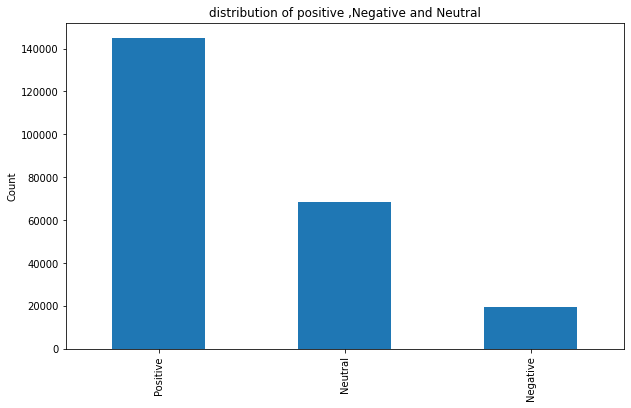

In [69]:
ax=df1['TextBlob_Analysis'].value_counts().plot(kind='bar',figsize=(10,6),title="distribution of positive ,Negative and Neutral")
ax.set_ylabel("Count")

In [70]:
df=df1

Average word length in each caption in Positive vs Negative

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each caption')

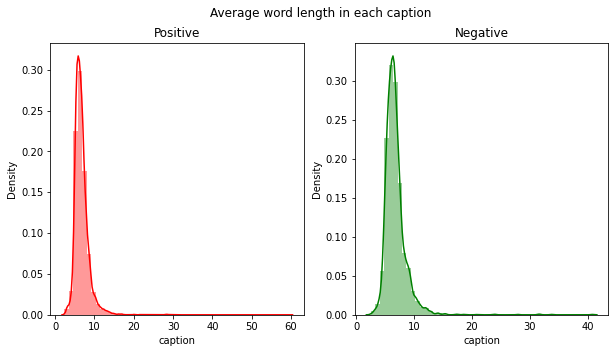

In [71]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['TextBlob_Analysis']=='Positive']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Positive')
word=df[df['TextBlob_Analysis']=='Negative']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Negative')
fig.suptitle('Average word length in each caption')

Average word length in each caption in Neutral vs Positive

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each caption')

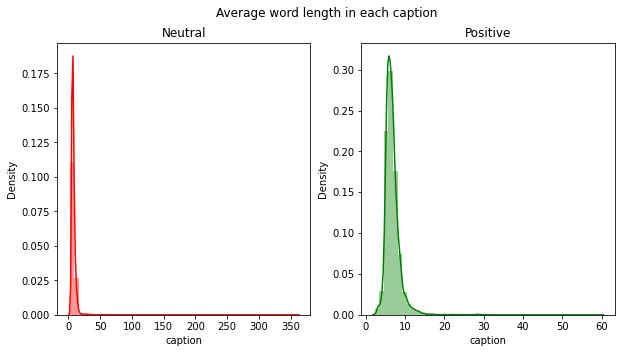

In [72]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['TextBlob_Analysis']=='Neutral']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Neutral')
word=df[df['TextBlob_Analysis']=='Positive']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Positive')
fig.suptitle('Average word length in each caption')

Average word length in each caption in Neutral vs Negative

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each caption')

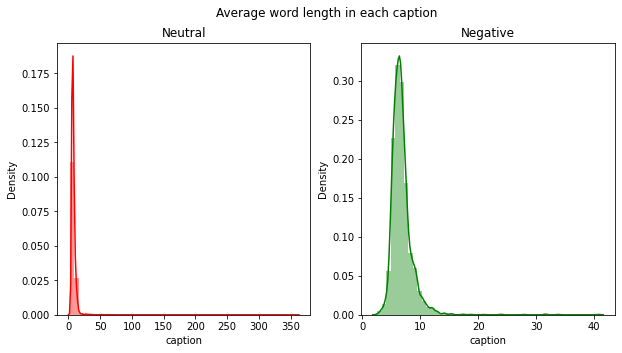

In [73]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['TextBlob_Analysis']=='Neutral']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Neutral')
word=df[df['TextBlob_Analysis']=='Negative']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Negative')
fig.suptitle('Average word length in each caption')

#Visualizing Hashtags

A Python package for online marketing productivity and analysis. You can learn more about it in the GitHub repo, and it can easily be installed by running:

In [74]:
!pip install advertools
import advertools as adv

Let's start by extracting the hashtags.



In [75]:
df['hashtags']

0         ['#keoghreport', '#cheapandnasty', '#blackmark...
1         ['#keoghreport', '#cheapandnasty', '#blackmark...
2         ['#keoghreport', '#cheapandnasty', '#blackmark...
3         ['#keoghreport', '#cheapandnasty', '#blackmark...
4         ['#keoghreport', '#cheapandnasty', '#blackmark...
                                ...                        
232900                                                   []
232901                                                   []
232902                                                   []
232903                                                   []
232904                                                   []
Name: hashtags, Length: 232905, dtype: object

In [76]:
hashtag_summary = adv.extract_hashtags(df['hashtags'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

The most general one to get a quick idea about the data is the overview key.
This shows us how many posts we have, the total number of hashtags (or mentions, or emoji), the average number of hashtags per post, and the number of unique hashtags.

In [77]:
hashtag_summary['overview']

{'hashtags_per_post': 9.247684678302312,
 'num_hashtags': 2153832,
 'num_posts': 232905,
 'unique_hashtags': 41545}

Next, we can explore the extracted hashtags themselves. Here we are looking at the first ten.
As you can see for each post we get a list of hashtags. We get an empty list wherever there are no hashtags in the tweet.

In [78]:
hashtag_summary['hashtags'][:10]

[['#keoghreport',
  '#cheapandnasty',
  '#blackmarketbotox',
  '#blackmarketinjectables',
  '#injectables',
  '#qualitycontrol',
  '#qualityoverprice',
  '#filler',
  '#hyalase',
  '#cqc',
  '#qualityclinic',
  '#checkyourinjector',
  '#injector',
  '#doctorledclinic',
  '#radiesse',
  '#sculptra',
  '#tweakments',
  '#3areas',
  '#foreheadwrinkles',
  '#crowsfeetbegone',
  '#crowsfeetbotox',
  '#crowsfeettreatment',
  '#smilelinesfiller',
  '#facialpeels',
  '#sculptra',
  '#teoxaneacademy',
  '#allergan',
  '#botoxbeforeandafter',
  '#10yearsyounger',
  '#nonsurgical'],
 ['#keoghreport',
  '#cheapandnasty',
  '#blackmarketbotox',
  '#blackmarketinjectables',
  '#injectables',
  '#qualitycontrol',
  '#qualityoverprice',
  '#filler',
  '#hyalase',
  '#cqc',
  '#qualityclinic',
  '#checkyourinjector',
  '#injector',
  '#doctorledclinic',
  '#radiesse',
  '#sculptra',
  '#tweakments',
  '#3areas',
  '#foreheadwrinkles',
  '#crowsfeetbegone',
  '#crowsfeetbotox',
  '#crowsfeettreatment',


Next, we take a look at the flattened list of hashtags. hashtags_flat is the name of this list and it basically is a single-dimensional list of all the available hashtags.
This is convenient if you want to do aggregate analysis on the whole set of hashtags.

In [79]:
hashtag_summary['hashtags_flat'][:10]

['#keoghreport',
 '#cheapandnasty',
 '#blackmarketbotox',
 '#blackmarketinjectables',
 '#injectables',
 '#qualitycontrol',
 '#qualityoverprice',
 '#filler',
 '#hyalase',
 '#cqc']

The count of hashtags for each tweet is given by the hashtag_counts key.
Later, we will combine all these in one DataFrame and do further analysis on them

In [80]:
hashtag_summary['hashtag_counts'][:20]

[30,
 30,
 30,
 30,
 30,
 30,
 28,
 28,
 28,
 28,
 28,
 28,
 16,
 16,
 16,
 16,
 16,
 16,
 21,
 21]

It is also interesting to know the frequency of using hashtags in this data set.
The hashtag_freq key shows us the number of tweets containing 1, 2, 3, etc hashtags.

In [81]:
hashtag_summary['hashtag_freq'][:15]

[(0, 53501),
 (1, 16224),
 (2, 11717),
 (3, 8948),
 (4, 7897),
 (5, 7484),
 (6, 8340),
 (7, 7964),
 (8, 6761),
 (9, 7408),
 (10, 7405),
 (11, 7080),
 (12, 6522),
 (13, 5597),
 (14, 5533)]

Visualizing the frequencies to get a better overview of how they are distributed, we plot the top fifteen frequencies:

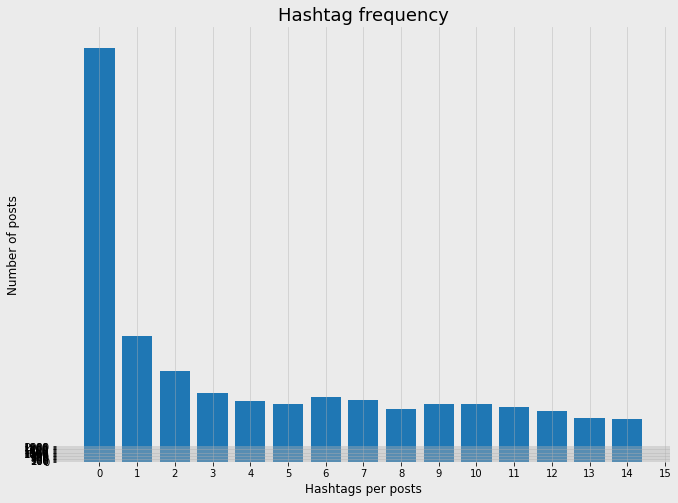

In [82]:
plt.figure(facecolor='#ebebeb', figsize=(11, 8))
plt.bar([x[0] for x in hashtag_summary['hashtag_freq'][:15]],
        [x[1] for x in hashtag_summary['hashtag_freq'][:15]])
plt.title('Hashtag frequency', fontsize=18)
plt.xlabel('Hashtags per posts', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)
plt.xticks(range(16))
plt.yticks(range(0, 2100, 100))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

You are probably wonderig which are the top hashtags

In [83]:
hashtag_summary['top_hashtags'][:10]

[('#plasticsurgery', 29203),
 ('#london', 22359),
 ('#cosmeticsurgery', 22241),
 ('#beauty', 21867),
 ('#plasticsurgeon', 18529),
 ('#harleystreet', 15383),
 ('#skincare', 14247),
 ('#beforeandafter', 12664),
 ('#breastaugmentation', 11258),
 ('#surgery', 9771)]

Visualizing the same data

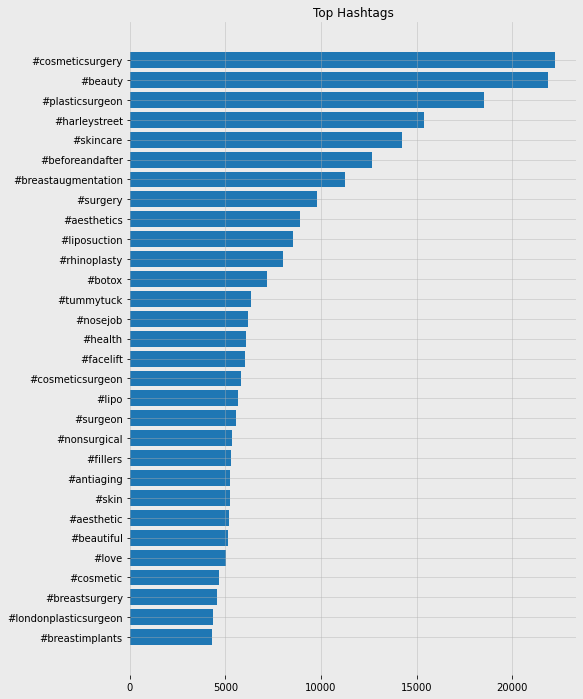

In [84]:
plt.figure(facecolor='#ebebeb', figsize=(8, 12))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

#Emoji's

You will see that the extract_emoji function is pretty much the same as extract_hashtags. The only difference is that it has emoji both as images and their textual counterparts.

In [ ]:
emoji_summary = adv.extract_emoji(df['caption'])
emoji_summary.keys()

In [ ]:
emoji_summary['overview']

In [ ]:
emoji_summary['emoji'][:20]

In [ ]:
emoji_summary['emoji_text'][:20]

In [ ]:
emoji_summary['emoji_flat'][:10]

In [ ]:
emoji_summary['emoji_flat_text'][:10]

In [ ]:
list(zip(emoji_summary['emoji_flat'][:10], emoji_summary['emoji_flat_text'][:10]))

In [ ]:
emoji_summary['emoji_counts'][:15]

In [ ]:
emoji_summary['emoji_freq'][:15]

In [ ]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in emoji_summary['emoji_freq'][:15]],
        [x[1] for x in emoji_summary['emoji_freq'][:15]])
plt.title('Emoji frequency', fontsize=18)
plt.xlabel('Emoji per post', fontsize=12)
plt.ylabel('Number of post', fontsize=12)
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [ ]:
emoji_summary['top_emoji'][:20]

In [ ]:
emoji_summary['top_emoji_text'][:20]

In [ ]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in emoji_summary['top_emoji_text'][:20]][::-1],
         [x[1] for x in emoji_summary['top_emoji_text'][:20]][::-1])
plt.title('Top Emoji')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

#mentions

In [88]:
mention_summary = adv.extract_mentions(df['caption'])
mention_summary.keys()

dict_keys(['mentions', 'mentions_flat', 'mention_counts', 'mention_freq', 'top_mentions', 'overview'])

In [89]:
mention_summary['overview']

{'mentions_per_post': 0.0,
 'num_mentions': 0,
 'num_posts': 232905,
 'unique_mentions': 0}

In [90]:
mention_summary['mentions'][:15]

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

In [91]:
mention_summary['mentions_flat'][:10]

[]

In [92]:
mention_summary['mention_counts'][:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [93]:
mention_summary['mention_freq'][:15]

[(0, 232905)]

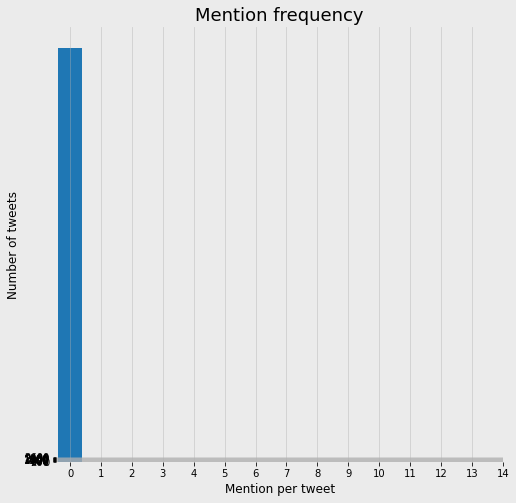

In [94]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in mention_summary['mention_freq'][:15]],
        [x[1] for x in mention_summary['mention_freq'][:15]])
plt.title('Mention frequency', fontsize=18)
plt.xlabel('Mention per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(15))
plt.yticks(range(0, 2800, 200))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [95]:
mention_summary['top_mentions'][:10]

[]

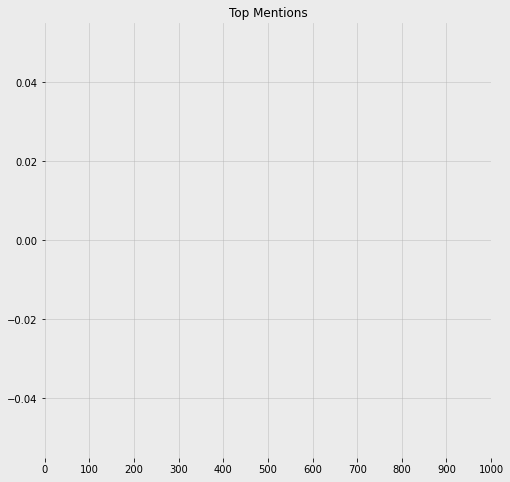

In [96]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
plt.title('Top Mentions')
plt.grid(alpha=0.5)
plt.xticks(range(0, 1100, 100))
plt.gca().set_frame_on(False)

#Questions

In [97]:
question_summary = adv.extract_questions(df['caption'])

In [98]:
question_summary.keys()

dict_keys(['question_marks', 'question_marks_flat', 'question_mark_counts', 'question_mark_freq', 'top_question_marks', 'overview', 'question_mark_names', 'question_text'])

In [99]:
question_summary['overview']

{'num_posts': 232905,
 'num_question_marks': 12366,
 'question_marks_per_post': 0.05309460939009467,
 'unique_question_marks': 1}

In [100]:
question_summary['question_mark_freq']

[(0, 228022),
 (1, 2309),
 (2, 997),
 (3, 621),
 (4, 312),
 (5, 174),
 (6, 169),
 (7, 117),
 (8, 55),
 (9, 6),
 (10, 30),
 (11, 30),
 (12, 6),
 (14, 18),
 (15, 3),
 (16, 12),
 (19, 6),
 (20, 6),
 (25, 6),
 (30, 6)]

In [101]:
question_summary['top_question_marks'] # this is more interesting if you have questions in different languages where different question marks are used.

[('¿', 12366)]

In [102]:
[(i,x) for i, x in  enumerate(question_summary['question_text']) if x][:15]

[]

#Intense Words

In [103]:
intense_summary = adv.extract_intense_words(df['caption'], min_reps=3)

In [104]:
intense_summary['overview']

{'intense_words_per_post': 0.16556106567055237,
 'num_intense_words': 38560,
 'num_posts': 232905,
 'unique_intense_words': 1360}

In [105]:
intense_summary['top_intense_words'][:20]

[('111', 1617),
 ('1111', 1254),
 ('wwwperfecteyesltdcom', 1185),
 ('azzz', 1157),
 ('111skin', 750),
 ('iii', 678),
 ('wwwshumailasclick', 668),
 ('4074098000', 624),
 ('1000', 556),
 ('info111harleystreetcomâ', 546),
 ('5222', 540),
 ('dzzz', 522),
 ('4098000', 486),
 ('httpswwwharleyelitegroupcouk', 486),
 ('wwwmodernaestheticsca', 484),
 ('wwwmanchesterprivatehospitalcoukâ\x81£â\x81£', 475),
 ('3058480008', 438),
 ('2486060000', 420),
 ('wwwmarkhoasjoecouk', 408),
 ('111harleyst', 408)]

#Currency Symbols

In [106]:
currency_summary = adv.extract_currency(df['caption'])

In [107]:
currency_summary.keys()

dict_keys(['currency_symbols', 'currency_symbols_flat', 'currency_symbol_counts', 'currency_symbol_freq', 'top_currency_symbols', 'overview', 'currency_symbol_names', 'surrounding_text'])

In [108]:
currency_summary['overview']

{'currency_symbols_per_post': 5.0376333698289,
 'num_currency_symbols': 1173290,
 'num_posts': 232905,
 'unique_currency_symbols': 5}

In [109]:
currency_summary['top_currency_symbols']

[('€', 696958), ('£', 334840), ('¢', 89864), ('¤', 29407), ('¥', 22221)]

In [110]:
[x for x in currency_summary['surrounding_text'] if x][:20]

[['injector fall prey â€˜pop upâ€™ shop use ',
  'credenti rcheck youâ€™r unsur ask see ins'],
 ['injector fall prey â€˜pop upâ€™ shop use ',
  'credenti rcheck youâ€™r unsur ask see ins'],
 ['injector fall prey â€˜pop upâ€™ shop use ',
  'credenti rcheck youâ€™r unsur ask see ins'],
 ['injector fall prey â€˜pop upâ€™ shop use ',
  'credenti rcheck youâ€™r unsur ask see ins'],
 ['injector fall prey â€˜pop upâ€™ shop use ',
  'credenti rcheck youâ€™r unsur ask see ins'],
 ['injector fall prey â€˜pop upâ€™ shop use ',
  'credenti rcheck youâ€™r unsur ask see ins'],
 ['We love dollyâ€™ style timeless bea',
  'uti 70â€™ forc reckon dolli ',
  'cosmet procedur sheâ€™ alway open honest ',
  'sheâ€™ done If youâ€™d like â€˜do like d',
  'ollyâ€˜ call u today best '],
 ['We love dollyâ€™ style timeless bea',
  'uti 70â€™ forc reckon dolli ',
  'cosmet procedur sheâ€™ alway open honest ',
  'sheâ€™ done If youâ€™d like â€˜do like d',
  'ollyâ€˜ call u today best '],
 ['We love dollyâ€™ style ti

In [112]:
extracted_posts =  (df[['account','caption',	'biography','following',	'likes','posts_count','followers'	,'image_url'	,'url'	,'comments'	,	'Dow',	'Hod','TextBlob_Subjectivity',	'TextBlob_Polarity'	,'TextBlob_Analysis',	'Average_Likes']]
 .assign(hashtags=hashtag_summary['hashtags'],
         hashcounts=hashtag_summary['hashtag_counts'],
         mentions=mention_summary['mentions'],
         mention_count=mention_summary['mention_counts'],
         emoji=emoji_summary['emoji'],
         emoji_text=emoji_summary['emoji_text'],
         emoji_count=emoji_summary['emoji_counts'],))
extracted_posts.head()

NameError: ignored

The dataset is imbalanced

A) Understanding the common words used in the captions: WordCloud

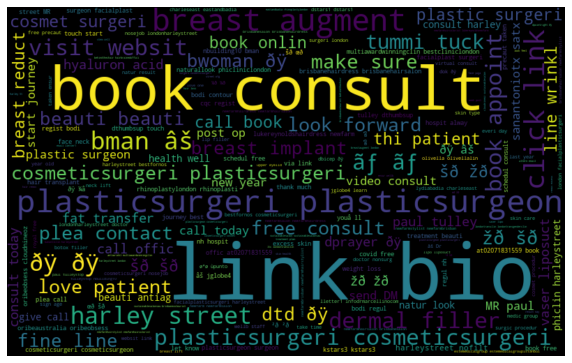

In [113]:
all_words = ' '.join([text for text in df['caption']]) 
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

Understanding the common words used in the Positive captions: WordCloud

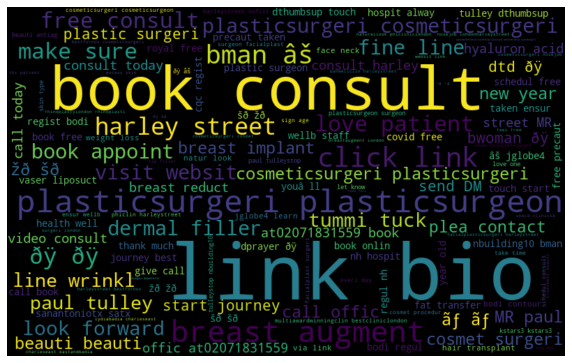

In [114]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
normal_words =' '.join([text for text in df['caption'][df['TextBlob_Analysis'] == 'Positive']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Understanding the common words used in the Negative captions: WordCloud

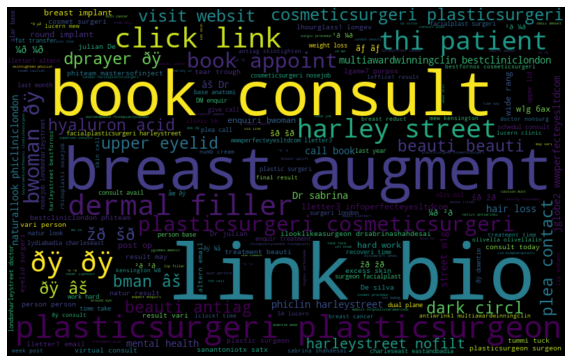

In [115]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
normal_words =' '.join([text for text in df['caption'][df['TextBlob_Analysis'] == 'Negative']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Understanding the common words used in the Neutral captions: WordCloud

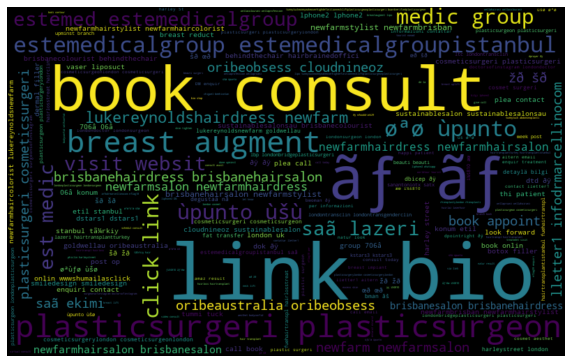

In [116]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
normal_words =' '.join([text for text in df['caption'][df['TextBlob_Analysis'] == 'Neutral']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [117]:
# def hashtag_extract1(x):
#     hashtags = []
#     for i in x:
#         ht = re.findall(r"#(\w+)", i)
#         hashtags.append(ht)
#     return hashtags

In [137]:
HT_positive = df['hashtags'][df['TextBlob_Analysis'] == 'Positive']
HT_positive

pandas.core.series.Series

In [127]:
HT_negative = df['caption'][df['TextBlob_Analysis'] == 'Negative']

In [128]:
HT_neutral =df['caption'][df['TextBlob_Analysis'] == 'Neutral']

In [139]:
HT_positive = sum(HT_positive,[]) 
HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])

TypeError: ignored

Let's plot the top ‘n’ hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

In [130]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    }
)

selecting top 20 most frequent hashtags in Positive hashtags

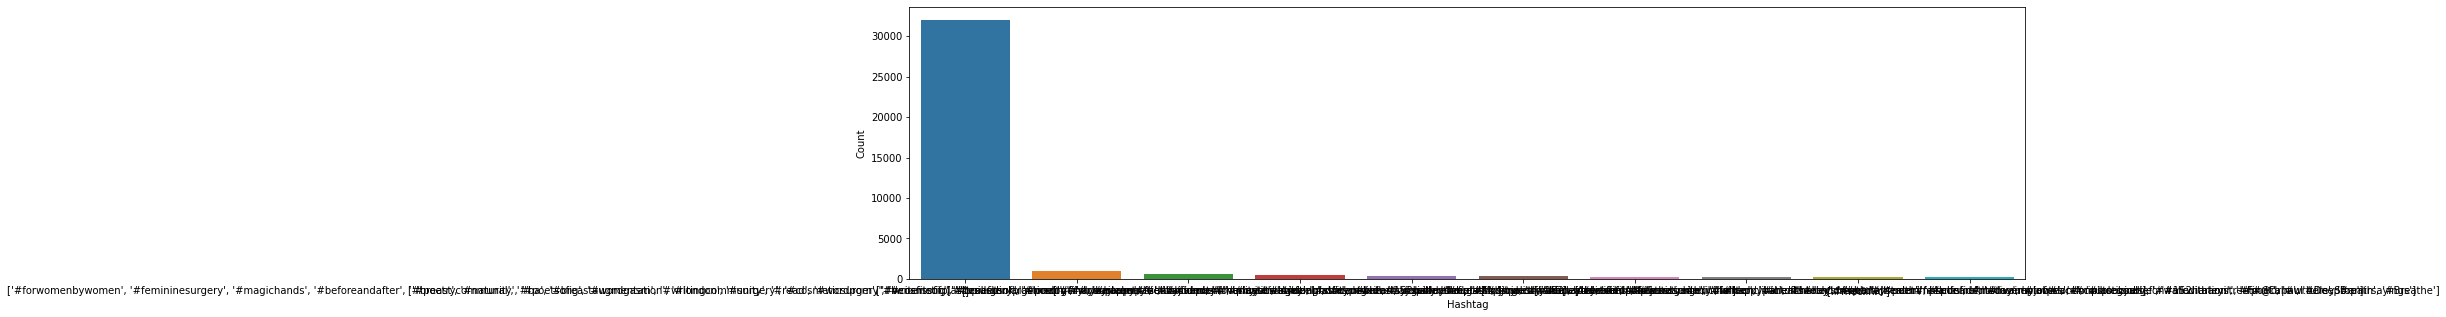

In [131]:
import seaborn as sns 

d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

selecting top 20 most frequent hashtags in Negative hashtags

In [132]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    }
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0, flags=flags)


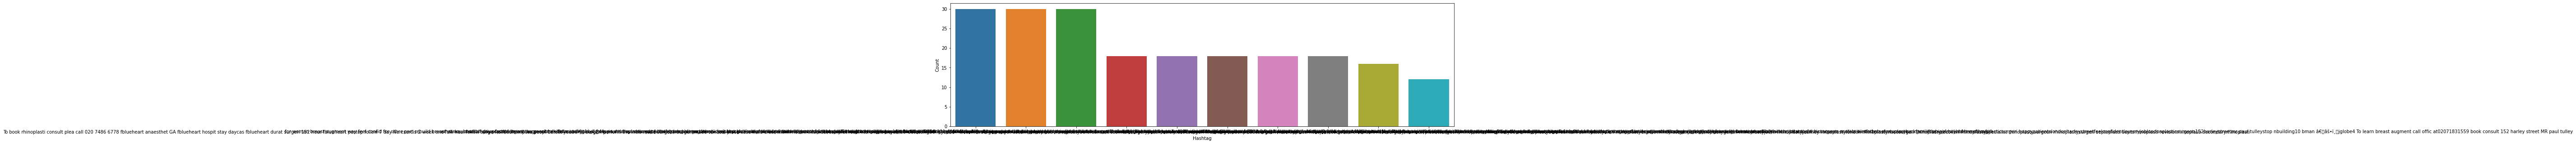

In [133]:
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

selecting top 20 most frequent hashtags in Neutral hashtags

In [134]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    }
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags

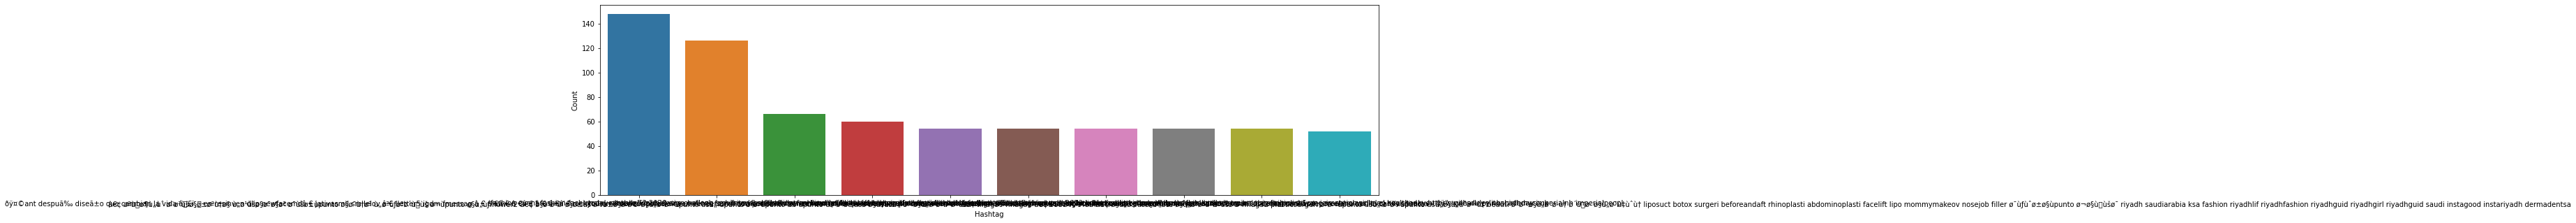

In [135]:
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

###Bag of words Features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['caption'])
bow.shape

##TFIDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['caption'])
tfidf.shape

##Word2Vec Features

In [ ]:
import gensim 

tokenized_post = df['caption'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(tokenized_post,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
)
model_w2v.train(tokenized_post, total_examples= len(df['caption']), epochs=20)

In [ ]:
model_w2v.wv.most_similar(positive="beauty")

### Preparing vectors for tweet

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

Preparing word2vec feature set

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_post), 200)) 
for i in range(len(tokenized_post)):
    wordvec_arrays[i,:] = word_vector(tokenized_post[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

#Modelling